In [79]:
!pip install pycountry
import pycountry
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import numpy as np
import random

In [80]:
riskTrend = pd.read_csv("worldriskindex-trend.csv")

riskBase = riskTrend.drop(list(riskTrend.filter(regex='Norm')), axis=1)
riskBase.columns = riskBase.columns.str.replace("_Base", "")
riskBase.head()

WRI.Country ISO3.Code  Year      W     E      V      S      C      A  \
0  Afghanistan       AFG  2000   4.18  0.25  69.83  61.97  73.22  75.05   
1      Albania       ALB  2000   7.23  2.38  21.96  22.58  44.37  10.57   
2      Algeria       DZA  2000  10.28  2.65  39.85  29.57  52.73  40.58   
3      Andorra       AND  2000   0.29  0.02   4.32   2.84   2.15  13.18   
4       Angola       AGO  2000  10.98  2.18  55.35  35.29  62.14  77.32   

    S_01  ...  AI_02b  AI_02c    AI_03a    AI_03b    AI_03c  AI_04a  AI_04b  \
0  64.24  ...    0.03    2.41   9323.50  13058.96  30884.23      24      24   
1  52.20  ...    0.12   24.22    136.67   2802.11   2123.41      97      97   
2  47.78  ...    0.02   17.72    161.04   1571.86   3186.61      86      86   
3  22.22  ...   26.46    9.29      3.79    680.31     87.55      98      95   
4  64.30  ...    0.01    2.09  14739.43   8834.26  38264.30      31      21   

   AI_04c   AI_05a  AI_05b  
0       5    28.99    6.29  
1      91  1232.01    0.00  
2      78  1750.31    0.30  
3      84  5783.29    5.75  
4      10   604.63  325.00  

[5 rows x 150 columns]

In [82]:
(riskBase.isna().sum() > 0).sum()

np.int64(0)

In [3]:
riskBase.columns[:60]

Index(['WRI.Country', 'ISO3.Code', 'Year', 'W', 'E', 'V', 'S', 'C', 'A',
       'S_01', 'S_02', 'S_03', 'S_04', 'S_05', 'C_01', 'C_02', 'C_03', 'A_01',
       'A_02', 'A_03', 'EI_01', 'EI_02', 'EI_03', 'EI_04', 'EI_05', 'EI_06',
       'EI_07', 'SI_01', 'SI_02', 'SI_03', 'SI_04', 'SI_05', 'SI_06', 'SI_07',
       'SI_08', 'SI_09', 'SI_10', 'SI_11', 'SI_12', 'SI_13', 'SI_14', 'CI_01',
       'CI_02', 'CI_03', 'CI_04', 'CI_05', 'CI_06', 'CI_07', 'AI_01', 'AI_02',
       'AI_03', 'AI_04', 'EI_01a', 'EI_01b', 'EI_01c', 'EI_01d', 'EI_01e',
       'EI_01f', 'EI_02a', 'EI_02b'],
      dtype='object')

In [4]:
riskBase["ISO3.Code"].unique()

array(['AFG', 'ALB', 'DZA', 'AND', 'AGO', 'ATG', 'ARG', 'ARM', 'AUS',
       'AUT', 'AZE', 'BHS', 'BHR', 'BGD', 'BRB', 'BLR', 'BEL', 'BLZ',
       'BEN', 'BTN', 'VEN', 'BIH', 'BWA', 'BRA', 'BRN', 'BGR', 'BFA',
       'BDI', 'KHM', 'CMR', 'CAN', 'CPV', 'CAF', 'TCD', 'CHL', 'CHN',
       'COL', 'COM', 'CRI', 'CIV', 'HRV', 'CUB', 'CYP', 'CZE', 'PRK',
       'COD', 'DNK', 'DJI', 'DMA', 'DOM', 'ECU', 'EGY', 'SLV', 'GNQ',
       'ERI', 'EST', 'SWZ', 'ETH', 'FSM', 'FJI', 'FIN', 'FRA', 'GAB',
       'GMB', 'GEO', 'DEU', 'GHA', 'GRC', 'GRD', 'GTM', 'GIN', 'GNB',
       'GUY', 'HTI', 'HND', 'HUN', 'ISL', 'IND', 'IDN', 'IRN', 'IRQ',
       'IRL', 'ISR', 'ITA', 'JAM', 'JPN', 'JOR', 'KAZ', 'KEN', 'KIR',
       'KWT', 'KGZ', 'LAO', 'LVA', 'LBN', 'LSO', 'LBR', 'LBY', 'LIE',
       'LTU', 'LUX', 'MDG', 'MWI', 'MYS', 'MDV', 'MLI', 'MLT', 'MHL',
       'MRT', 'MUS', 'MEX', 'MCO', 'MNG', 'MNE', 'MAR', 'MOZ', 'MMR',
       'NAM', 'NRU', 'NPL', 'NLD', 'NZL', 'NIC', 'NER', 'NGA', 'MKD',
       'NOR', 'OMN',

In [85]:
countryCode = "CAN"

country = riskBase[riskBase["ISO3.Code"] == countryCode]
country.head()


WRI.Country ISO3.Code  Year      W      E      V      S     C      A  \
30       Canada       CAN  2000  19.86  26.48  14.89  13.09  7.31  34.53   
223      Canada       CAN  2001  19.33  26.42  14.14  11.19  7.28  34.69   
416      Canada       CAN  2002  19.35  26.47  14.15  11.39  7.01  35.49   
609      Canada       CAN  2003  19.33  26.40  14.15  11.26  6.93  36.27   
802      Canada       CAN  2004  19.27  26.37  14.08  11.23  7.09  35.04   

      S_01  ...  AI_02b  AI_02c  AI_03a  AI_03b  AI_03c  AI_04a  AI_04b  \
30   23.37  ...    0.11   58.52    6.20  469.54  226.72      89      88   
223  24.02  ...    0.12   60.70    6.66  457.79  237.98      89      88   
416  25.22  ...    0.12   58.42    7.28  451.19  244.13      88      88   
609  24.50  ...    0.12   62.23    8.32  442.47  244.43      91      88   
802  24.25  ...    0.13   62.87    9.74  430.18  246.72      91      91   

     AI_04c   AI_05a  AI_05b  
30       80  5754.77     2.7  
223      81  6092.05     2.5  
416      77  6185.02     2.3  
609      76  6474.32     2.8  
802      77  7082.26     1.9  

[5 rows x 150 columns]

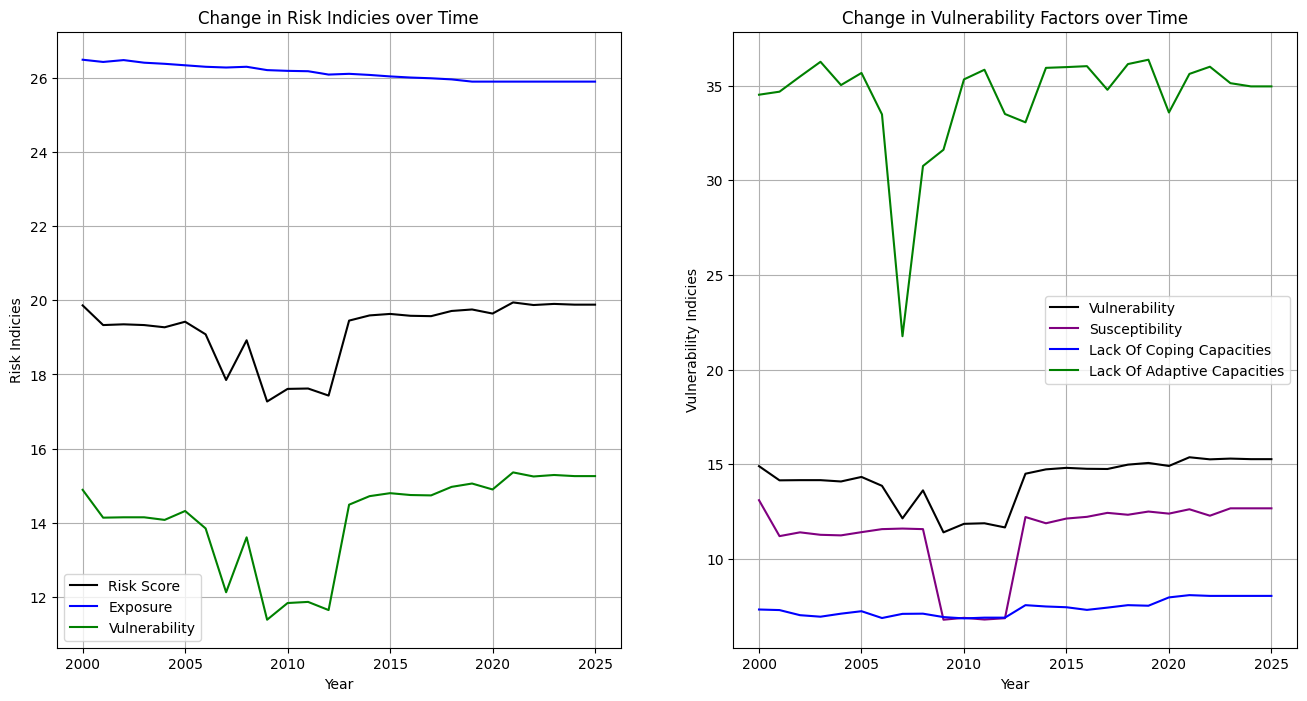

In [7]:
plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
plt.plot(country.Year, country.W, label="Risk Score", color="black")
plt.plot(country.Year, country.E, label="Exposure", color="blue")
plt.plot(country.Year, country.V, label="Vulnerability", color="green")

plt.xlabel("Year")
plt.ylabel("Risk Indicies")
plt.title("Change in Risk Indicies over Time")

plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(country.Year, country.V, label="Vulnerability", color="black")
plt.plot(country.Year, country.S, label="Susceptibility", color="purple")
plt.plot(country.Year, country.C, label="Lack Of Coping Capacities", color="blue")
plt.plot(country.Year, country.A, label="Lack Of Adaptive Capacities", color="green")

plt.xlabel("Year")
plt.ylabel("Vulnerability Indicies")
plt.title("Change in Vulnerability Factors over Time")

plt.legend()
plt.grid(True)

plt.show()


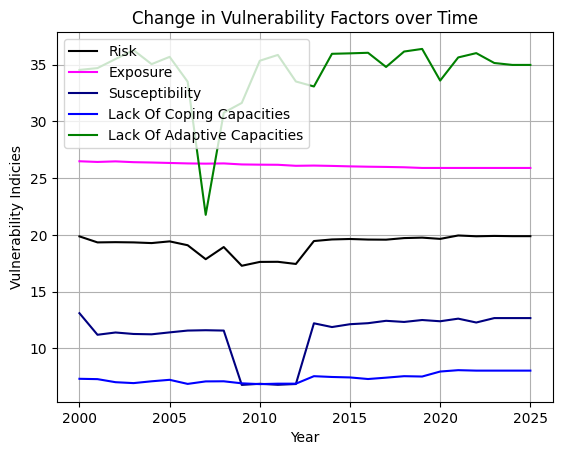

In [8]:
plt.plot(country.Year, country.W, label="Risk", color="black")
plt.plot(country.Year, country.E, label="Exposure", color="magenta")
plt.plot(country.Year, country.S, label="Susceptibility", color="navy")
plt.plot(country.Year, country.C, label="Lack Of Coping Capacities", color="blue")
plt.plot(country.Year, country.A, label="Lack Of Adaptive Capacities", color="green")

plt.xlabel("Year")
plt.ylabel("Vulnerability Indicies")
plt.title("Change in Vulnerability Factors over Time")

plt.legend()
plt.grid(True)
plt.show()


In [9]:
def generate_random_colour():
    max_rgb_value=200
    min_rgb_value=50
    r = random.randint(min_rgb_value, max_rgb_value)
    g = random.randint(min_rgb_value, max_rgb_value)
    b = random.randint(min_rgb_value, max_rgb_value)
    return (r / 255, g / 255, b / 255)

In [10]:
labels = pd.read_excel('worldriskindex-meta.xlsx')
codes = labels.Code
names = labels.Variable

map = dict(zip(codes, names))
map["E"] = "Exposure"
map

{'Country': 'Country Name',
 'ISO3': 'Three Digit Country Code',
 'W': 'WorldRiskIndex',
 'E': 'Exposure',
 'EI_01': 'Earthquakes',
 'EI_01a': 'Annually Averaged Population Exposed To Strong Intensity (Peak Ground Acceleration 0.1 g Or Higher)',
 'EI_01b': 'Annually Averaged Population Exposed To Strong Intensity (Peak Ground Acceleration 0.1 g Or Higher)',
 'EI_01c': 'Annually Averaged Population Exposed To Severe Intensity (Peak Ground Acceleration 0.2 g Or Higher)',
 'EI_01d': 'Annually Averaged Population Exposed To Severe Intensity (Peak Ground Acceleration 0.2 g Or Higher)',
 'EI_01e': 'Annually Averaged Population Exposed To Extreme Intensity (Peak Ground Acceleration 0.4 g Or Higher)',
 'EI_01f': 'Annually Averaged Population Exposed To Extreme Intensity (Peak Ground Acceleration 0.4 g Or Higher)',
 'EI_02': 'Tsunamis',
 'EI_02a': 'Annually Averaged Population Exposed To Strong Intensity (Coastal Run-Up Height 1.0 m Or Higher)',
 'EI_02b': 'Annually Averaged Population Exposed 

Why is there two of seemingly the same columns:


'EI_06a': 'Annually Averaged Population Exposed To Strong Intensity (6-Month SPEI 2.0 Or Higher)'


'EI_06b': 'Annually Averaged Population Exposed To Strong Intensity (6-Month SPEI 2.0 Or Higher)'

There is nothing to indicate AI_05 belonging to A_03

In [21]:
repeatSubgroups = ['EI_01b', 'EI_01d', 'EI_01f', 'EI_02b', 'EI_02d', 'EI_02f', 'EI_03b', 'EI_03d', 'EI_03f', 'EI_04b', 'EI_04d', 'EI_04f', 'EI_05b', 'EI_05d', 'EI_05f', 'EI_06b', 'EI_06d', 'EI_06f', 'EI_07b', 'SI_12b', 'SI_13b', 'SI_14b', 'CI_01b', 'CI_02b']

for col in repeatSubgroups:
  print(sum(country[col]))

0.9145300000000001
0.0044
0.00029
0.07886
0.026969999999999997
0.01928
0.50975
0.25867
0.08019
38.98294
32.88638
23.51588
1.46873
0.00424
0.0
157.26316
1.46489
0.00328
20.32383
15.040000000000001
3.65
0.0
0.852
0.0


Meta file says first is numbers, other is percentage.

How is the aggregate calculated from this? Geometric mean and sums does not make alot of sense in this context.

In [86]:
country.corr(numeric_only=True)

Year         W         E         V         S         C         A  \
Year    1.000000  0.364474 -0.982303  0.451866  0.288239  0.798955  0.223154   
W       0.364474  1.000000 -0.311193  0.995225  0.919512  0.720914  0.461156   
E      -0.982303 -0.311193  1.000000 -0.401733 -0.237471 -0.742077 -0.221350   
V       0.451866  0.995225 -0.401733  1.000000  0.909183  0.773013  0.467966   
S       0.288239  0.919512 -0.237471  0.909183  1.000000  0.656215  0.089800   
...          ...       ...       ...       ...       ...       ...       ...   
AI_04a  0.271498  0.194360 -0.269735  0.211979  0.391458  0.266591 -0.403069   
AI_04b  0.186420 -0.121844 -0.187544 -0.101261  0.172612  0.086554 -0.716823   
AI_04c  0.275840 -0.095256 -0.403718 -0.055473 -0.048294 -0.030844 -0.024941   
AI_05a  0.969745  0.317086 -0.935676  0.401579  0.265786  0.786657  0.133552   
AI_05b  0.207261  0.314458 -0.132387  0.319948  0.238798  0.382931  0.196657   

            S_01      S_02      S_03  ...    AI_02b    AI_02c    AI_03a  \
Year    0.641707  0.033169  0.938530  ...  0.572137  0.953660 -0.444440   
W       0.624858  0.281792  0.204579  ... -0.180041  0.501957 -0.828391   
E      -0.635633 -0.015079 -0.941620  ... -0.530087 -0.918352  0.388495   
V       0.665495  0.278862  0.293149  ... -0.120751  0.578933 -0.842226   
S       0.533473  0.293879  0.194718  ... -0.147397  0.440578 -0.728382   
...          ...       ...       ...  ...       ...       ...       ...   
AI_04a  0.167065 -0.114919  0.320790  ...  0.343723  0.326298  0.026360   
AI_04b  0.017295 -0.152768  0.327929  ...  0.494853  0.200502  0.281898   
AI_04c  0.140997 -0.007595  0.443752  ...  0.014860  0.102556  0.218875   
AI_05a  0.541058  0.028160  0.939225  ...  0.663339  0.932134 -0.373596   
AI_05b  0.219195  0.148707  0.153619  ...  0.230434  0.340486 -0.404338   

          AI_03b    AI_03c    AI_04a    AI_04b    AI_04c    AI_05a    AI_05b  
Year   -0.965762 -0.859172  0.271498  0.186420  0.275840  0.969745  0.207261  
W      -0.221312 -0.609286  0.194360 -0.121844 -0.095256  0.317086  0.314458  
E       0.983157  0.808906 -0.269735 -0.187544 -0.403718 -0.935676 -0.132387  
V      -0.313282 -0.673628  0.211979 -0.101261 -0.055473  0.401579  0.319948  
S      -0.141419 -0.487028  0.391458  0.172612 -0.048294  0.265786  0.238798  
...          ...       ...       ...       ...       ...       ...       ...  
AI_04a -0.163025 -0.144989  1.000000  0.838480  0.014522  0.349983  0.028656  
AI_04b -0.144987  0.056073  0.838480  1.000000  0.168187  0.283715 -0.070221  
AI_04c -0.468762  0.048820  0.014522  0.168187  1.000000  0.207963 -0.427889  
AI_05a -0.925097 -0.823712  0.349983  0.283715  0.207963  1.000000  0.331630  
AI_05b -0.106376 -0.440235  0.028656 -0.070221 -0.427889  0.331630  1.000000  

[148 rows x 148 columns]

In [87]:
# Evil Shenanigans
country['SI_15'] = country['S_05']
country['AI_05'] = country['A_03']

map['SI_15'] = 'Vulnerable Populations Due To Diseases And Epidemics'
map['AI_05'] = 'Investment Capacities'

/tmp/ipython-input-248415033.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country['SI_15'] = country['S_05']
/tmp/ipython-input-248415033.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country['AI_05'] = country['A_03']


Adding copies of S_05 and A_03 named SI_15 and AI_05 for displaying purposes.

In [88]:
def plotSubcategoriesA(targetCategories, searchCategories, lengthOfCategories):
  fixedSubstring = "_"

  for i in range(len(targetCategories)):
    target = targetCategories[i]
    category = searchCategories[i]
    length = lengthOfCategories[i]

    plt.figure(figsize=(length*3,length*2))
    plt.plot(country.Year, country[target], label=map[target], color="black")

    for j in range(length):
      lengthFormater = ""

      if (j < 9):
        lengthFormater = "0"

      subCategory = category + fixedSubstring + lengthFormater + str(j+1)
      plt.plot(country.Year, country[subCategory], label=map[subCategory], color=generate_random_colour())


    plt.xlabel("Year")
    plt.ylabel(map[target] + " Indicies")
    plt.title("Change in " + map[target]+ " Factors over Time")

    plt.legend()
    plt.grid(True)
    plt.show()

In [89]:
def plotSubcategoriesB(searchCategories, lengthOfCategories):
  for i in range(len(searchCategories)):
    category = searchCategories[i]
    length = lengthOfCategories[i]

    plt.figure(figsize=(length*3,length*2))
    plt.plot(country.Year, country[category], label=map[category], color="black")

    for j in range(length):
      subCategory = category + chr(97 + j)
      try:
        plt.plot(country.Year, country[subCategory], label=map[subCategory], color=generate_random_colour())
      except:
        print(subCategory)

    plt.xlabel("Year")
    plt.ylabel(map[category] + " Indicies")
    plt.title("Change in " + map[category]+ " Factors over Time")

    plt.legend()
    plt.grid(True)
    plt.show()

In [90]:
def generateSubcatName(searchCategories, lengthOfCategories):
  fixedSubstring = "_"
  result = []

  for i in range(len(searchCategories)):
    category = searchCategories[i]
    length = lengthOfCategories[i]
    subCategories = []

    for j in range(length):
      lengthFormater = ""

      if (j < 9):
        lengthFormater = "0"

      subCategory = category + fixedSubstring + lengthFormater + str(j+1)
      subCategories.append(subCategory)

    result.append(subCategories)

  return(result)

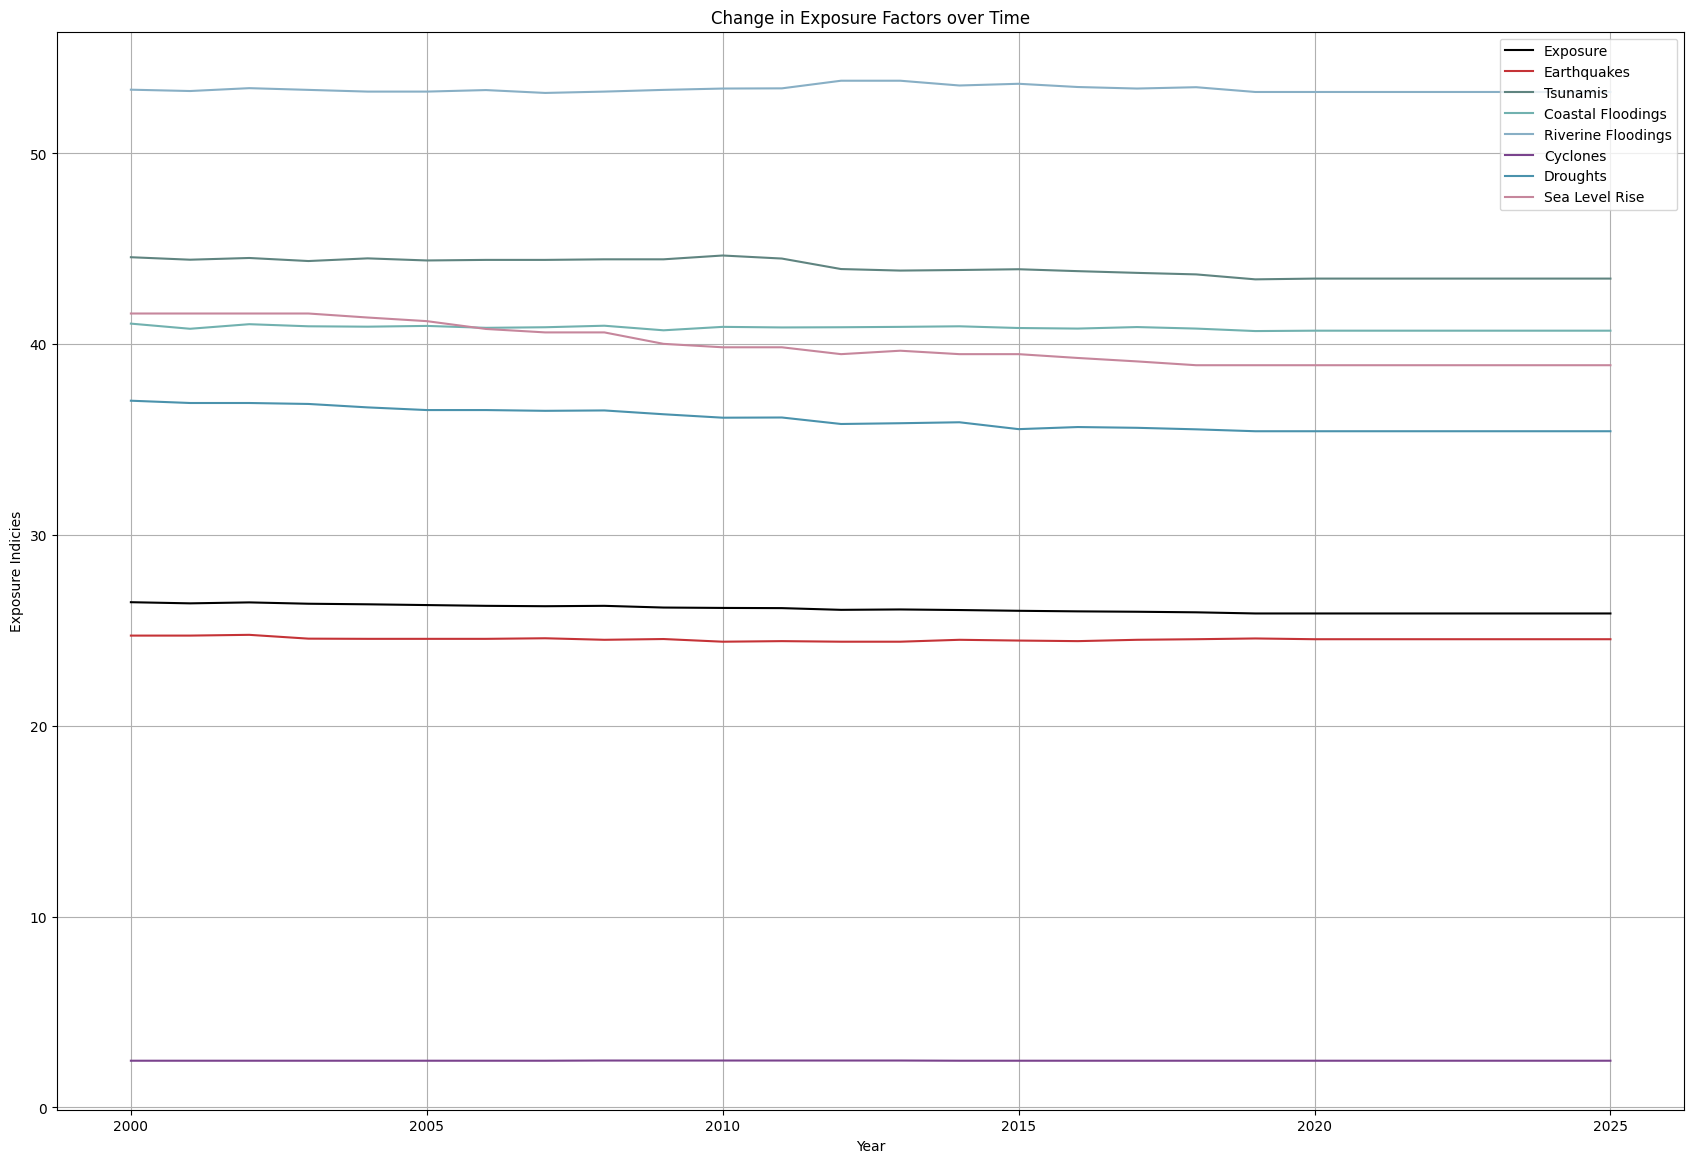

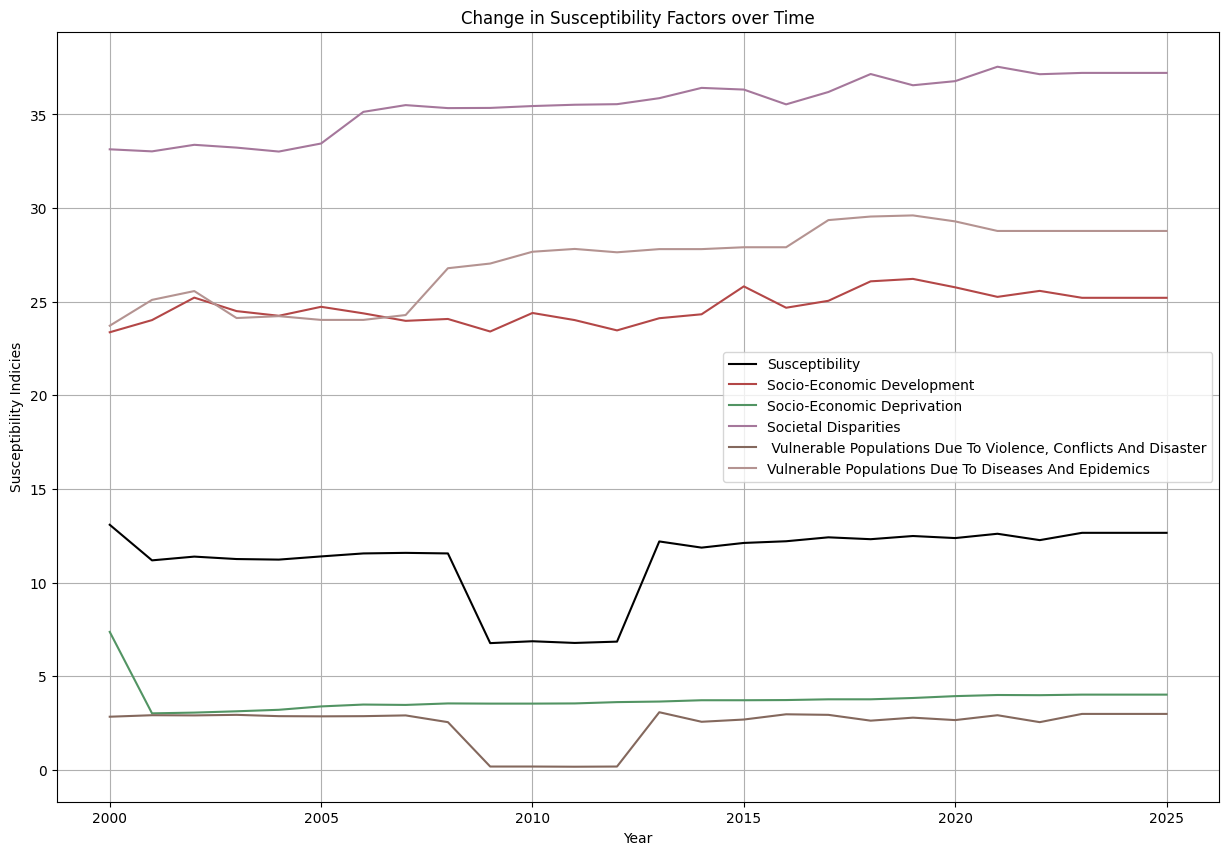

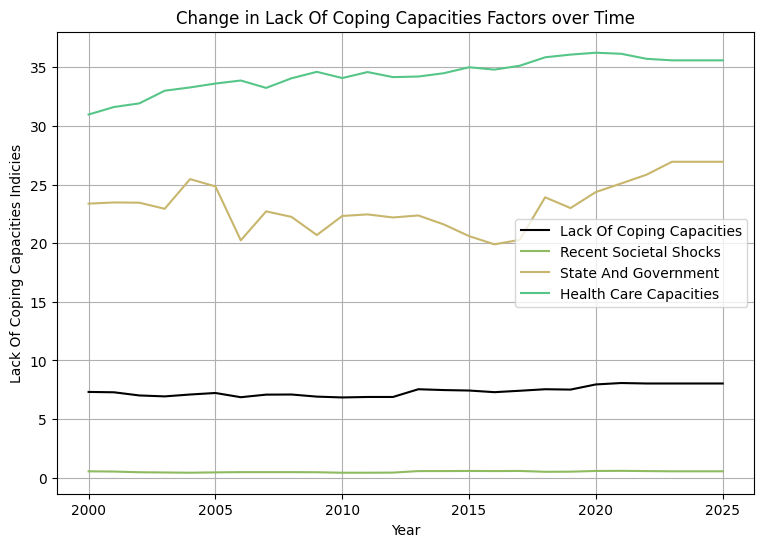

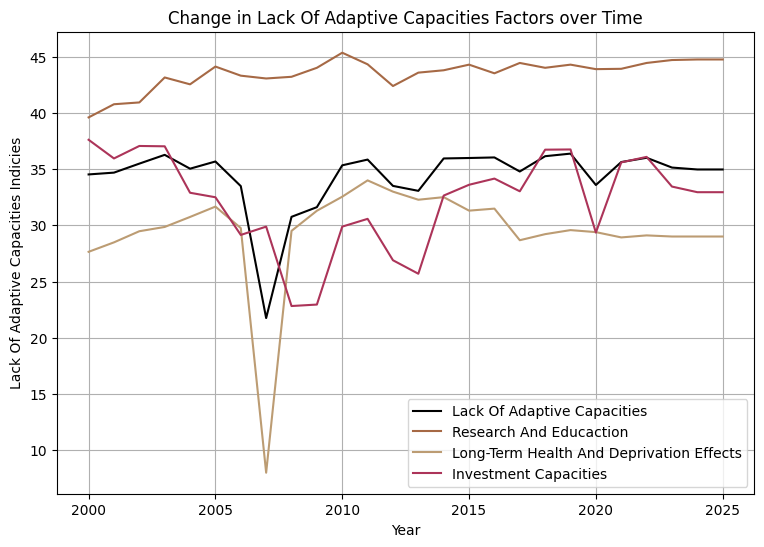

In [ ]:
base = ["E", "S", "C", "A"]
search = ["EI", "S", "C", "A"]
categoryLength = [7, 5, 3, 3]

plotSubcategoriesA(base, search, categoryLength)

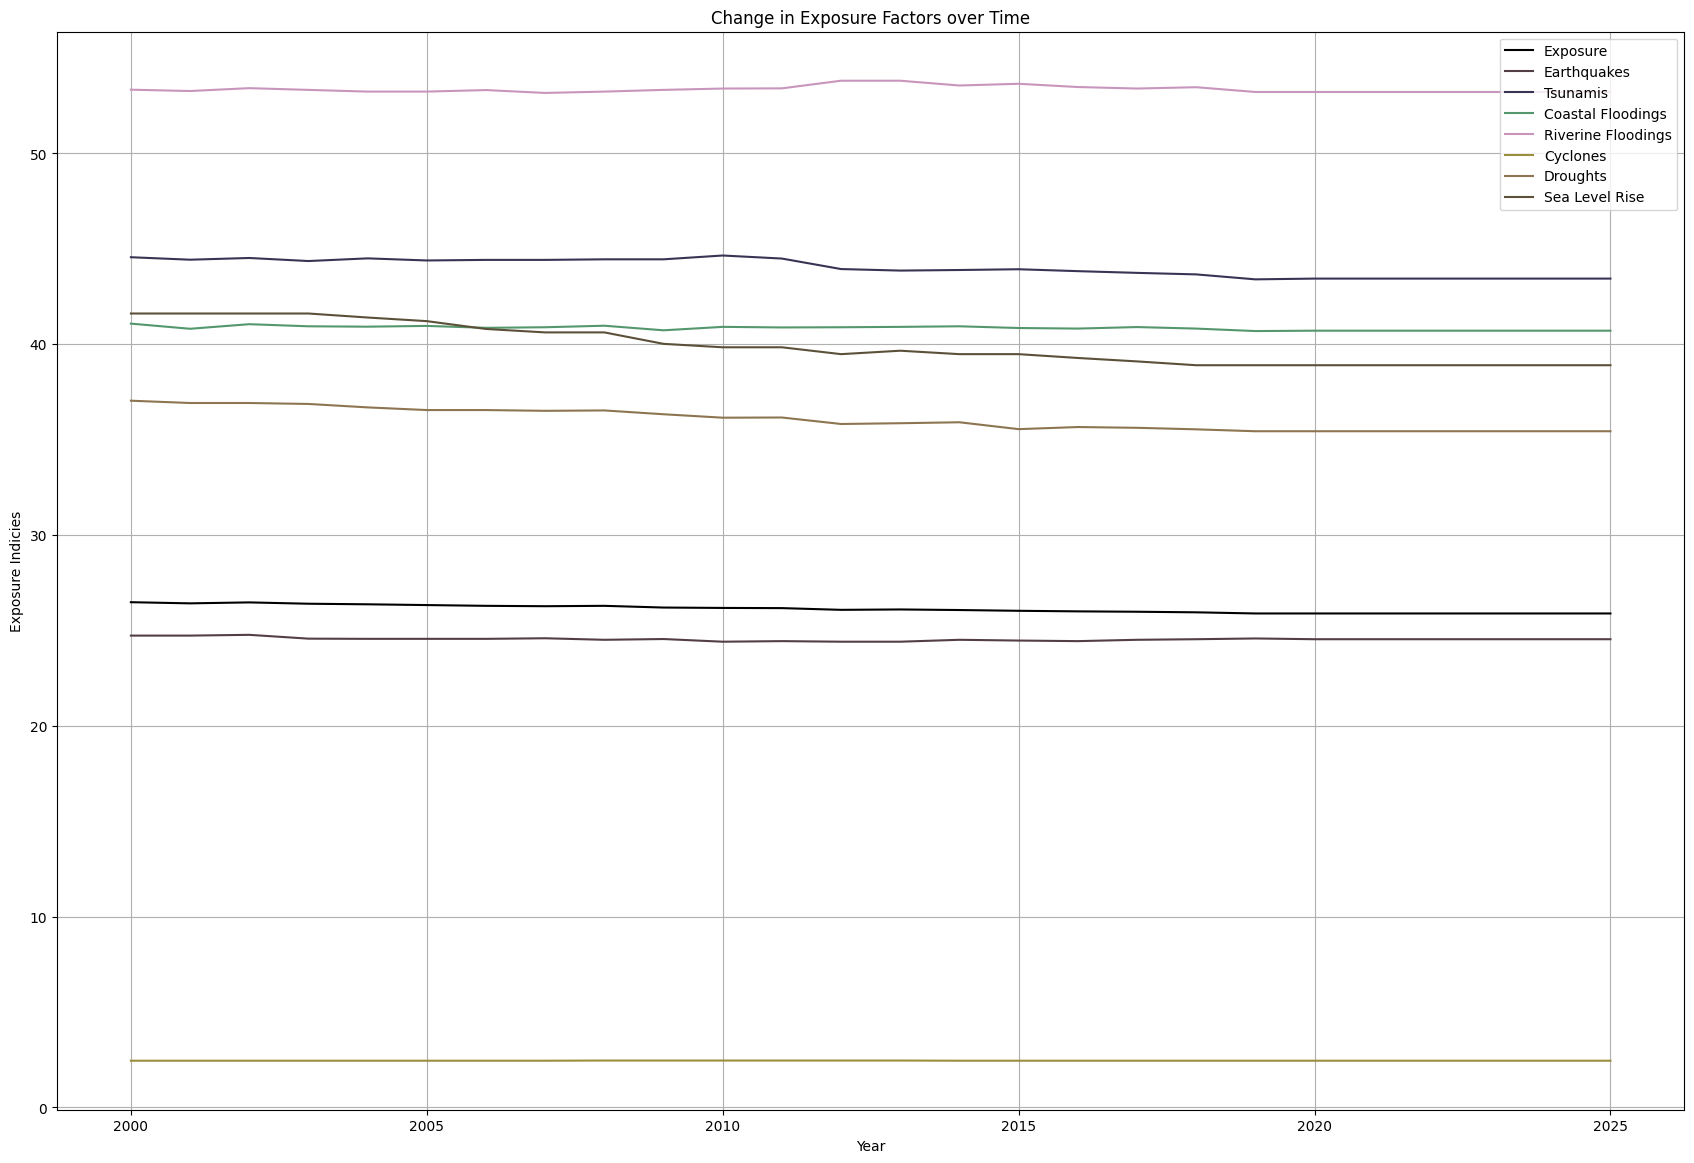

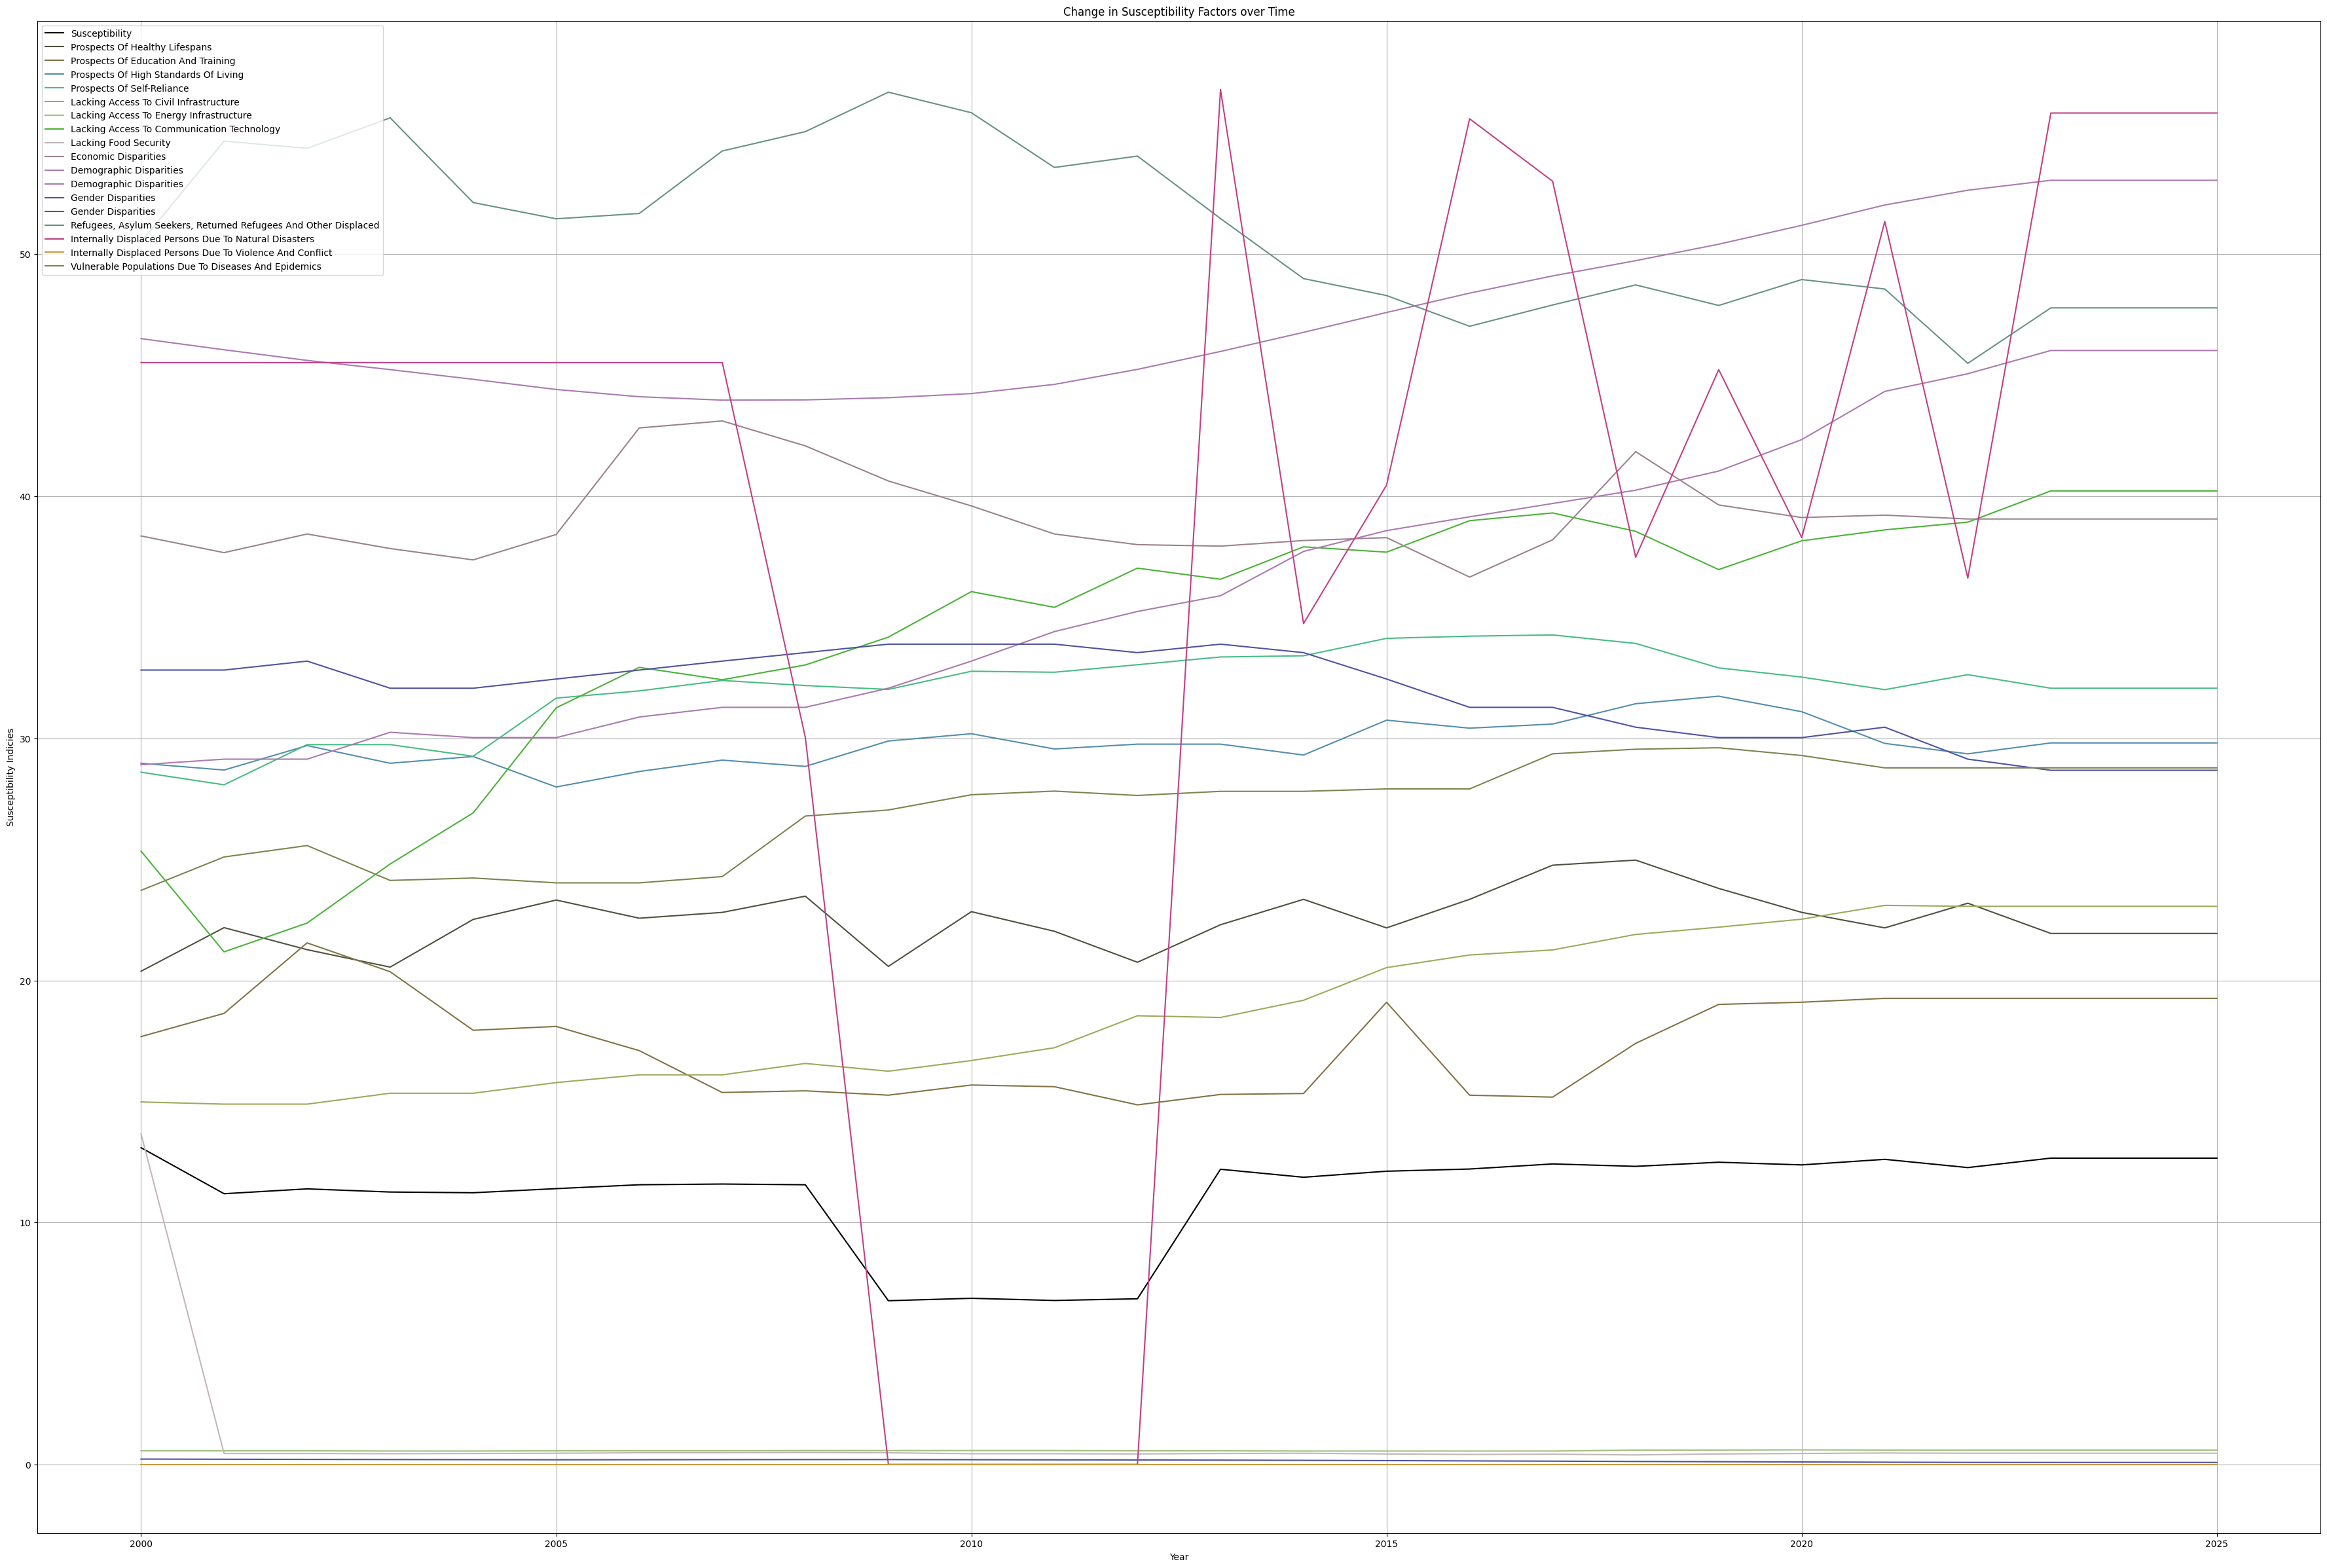

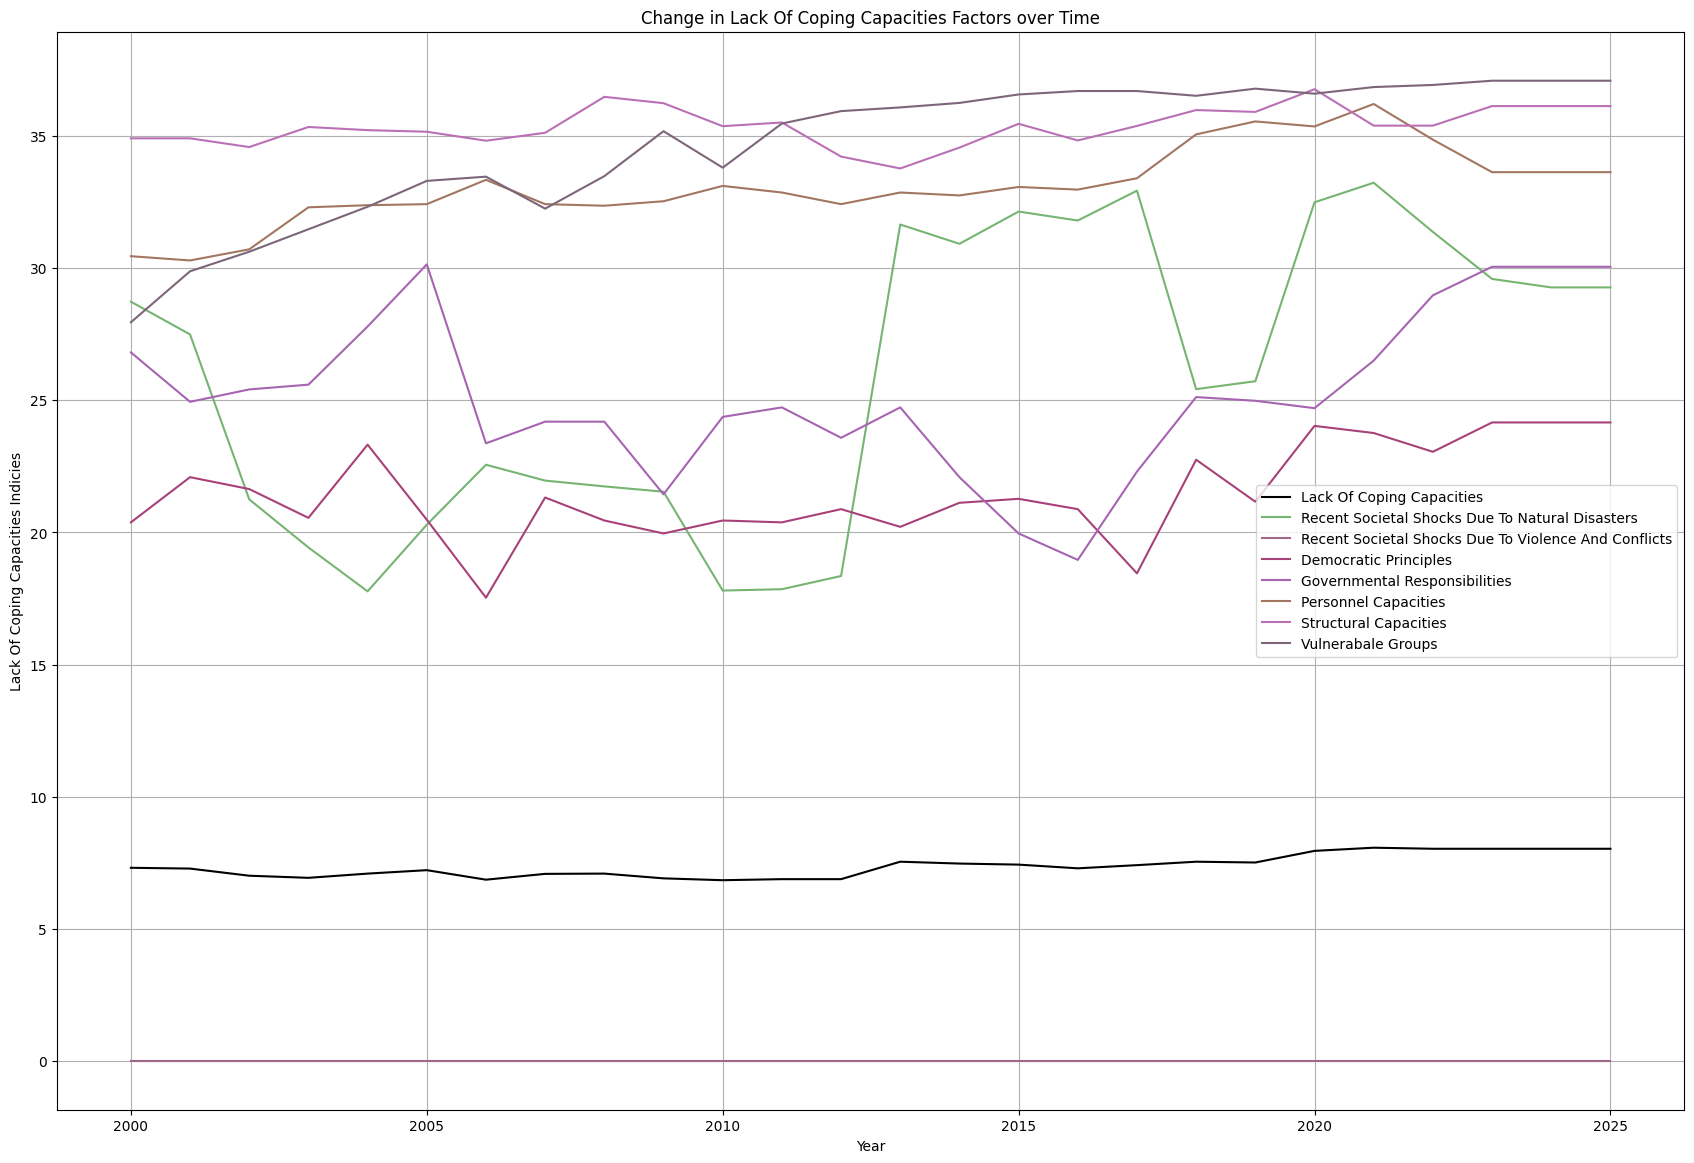

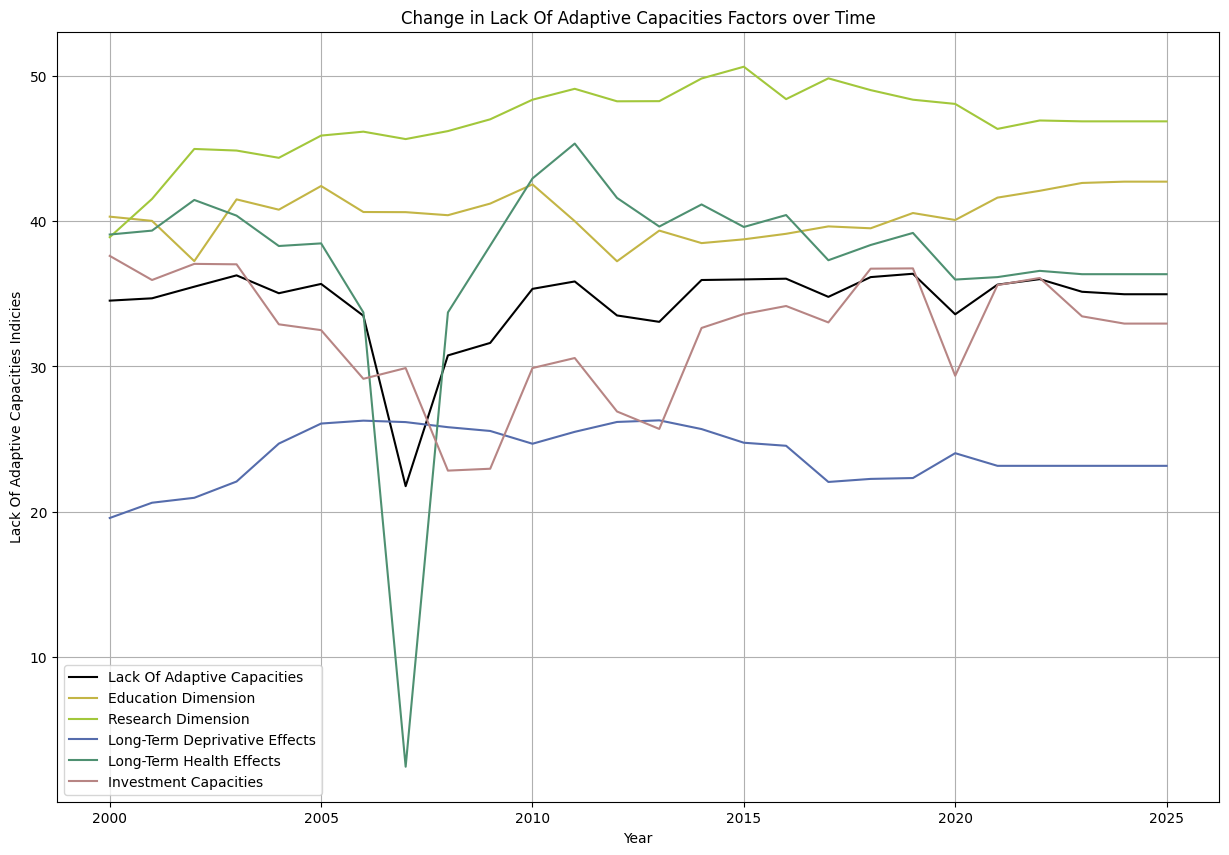

In [ ]:
base = ["E", "S", "C", "A"]
search = ["EI","SI", "CI", "AI"]
categoryLength = [7, 15, 7, 5]

plotSubcategoriesA(base, search, categoryLength)

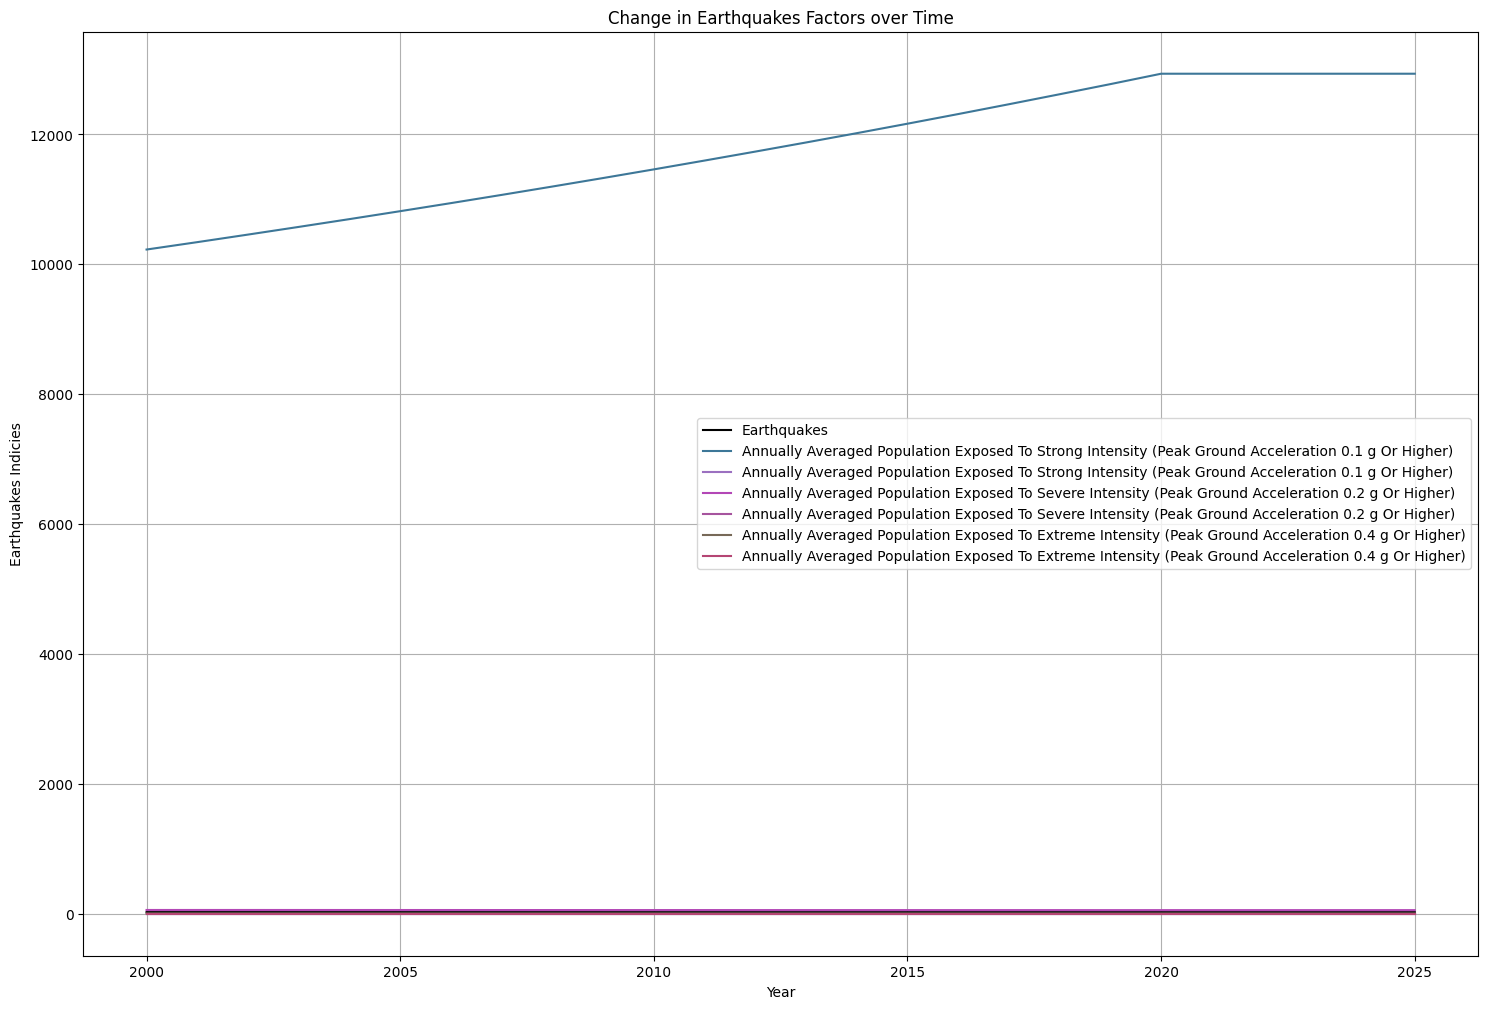

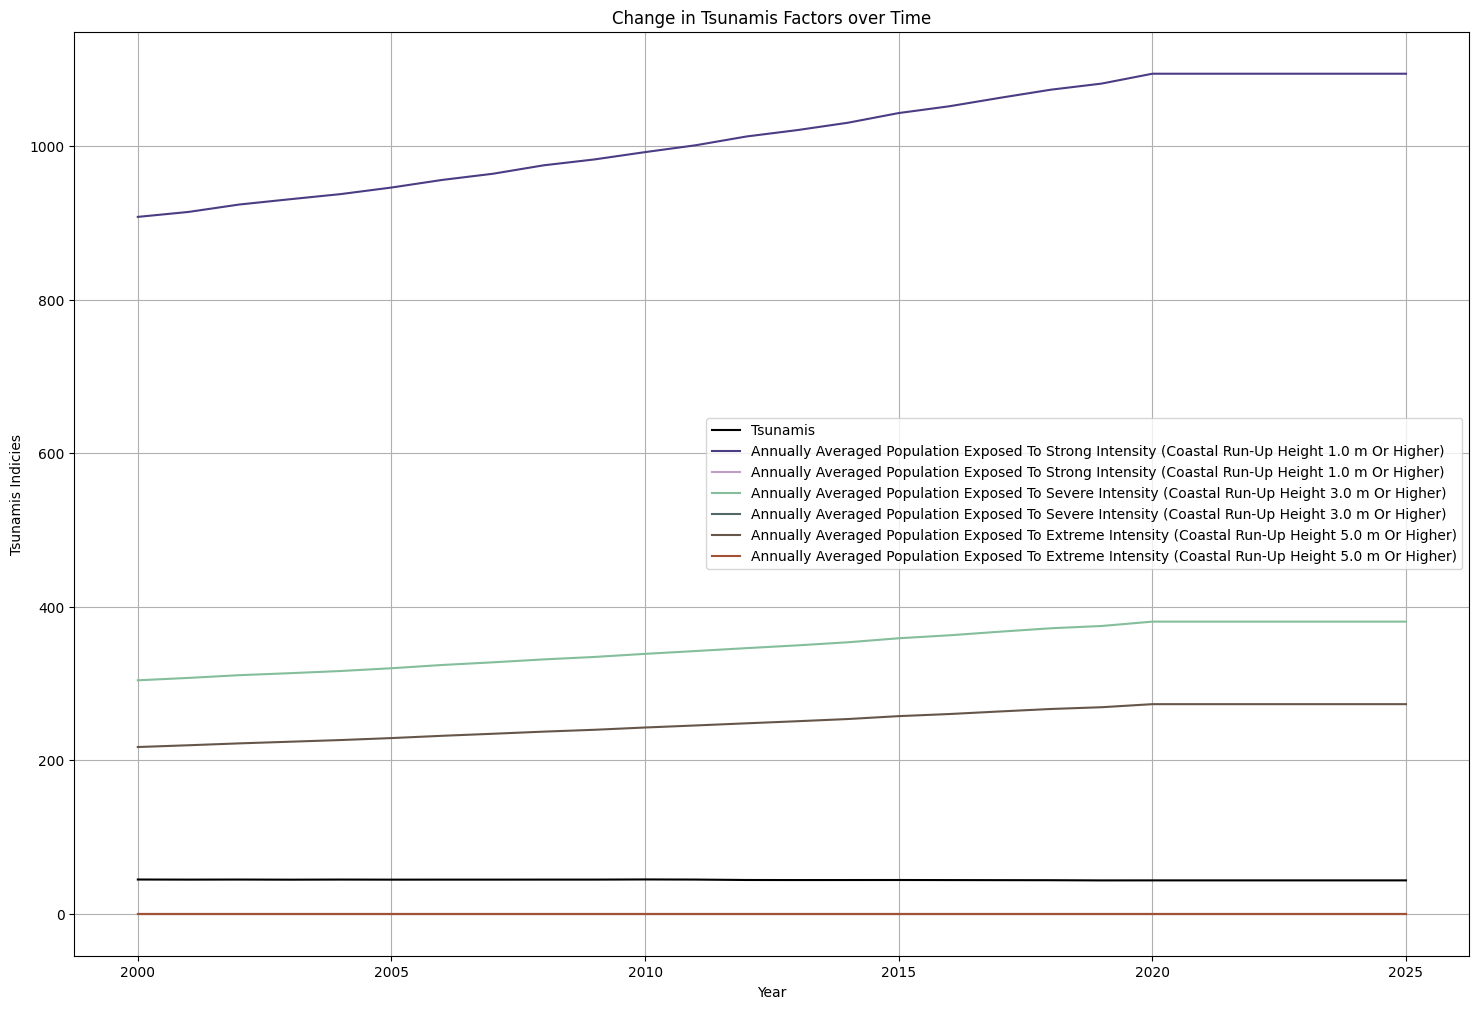

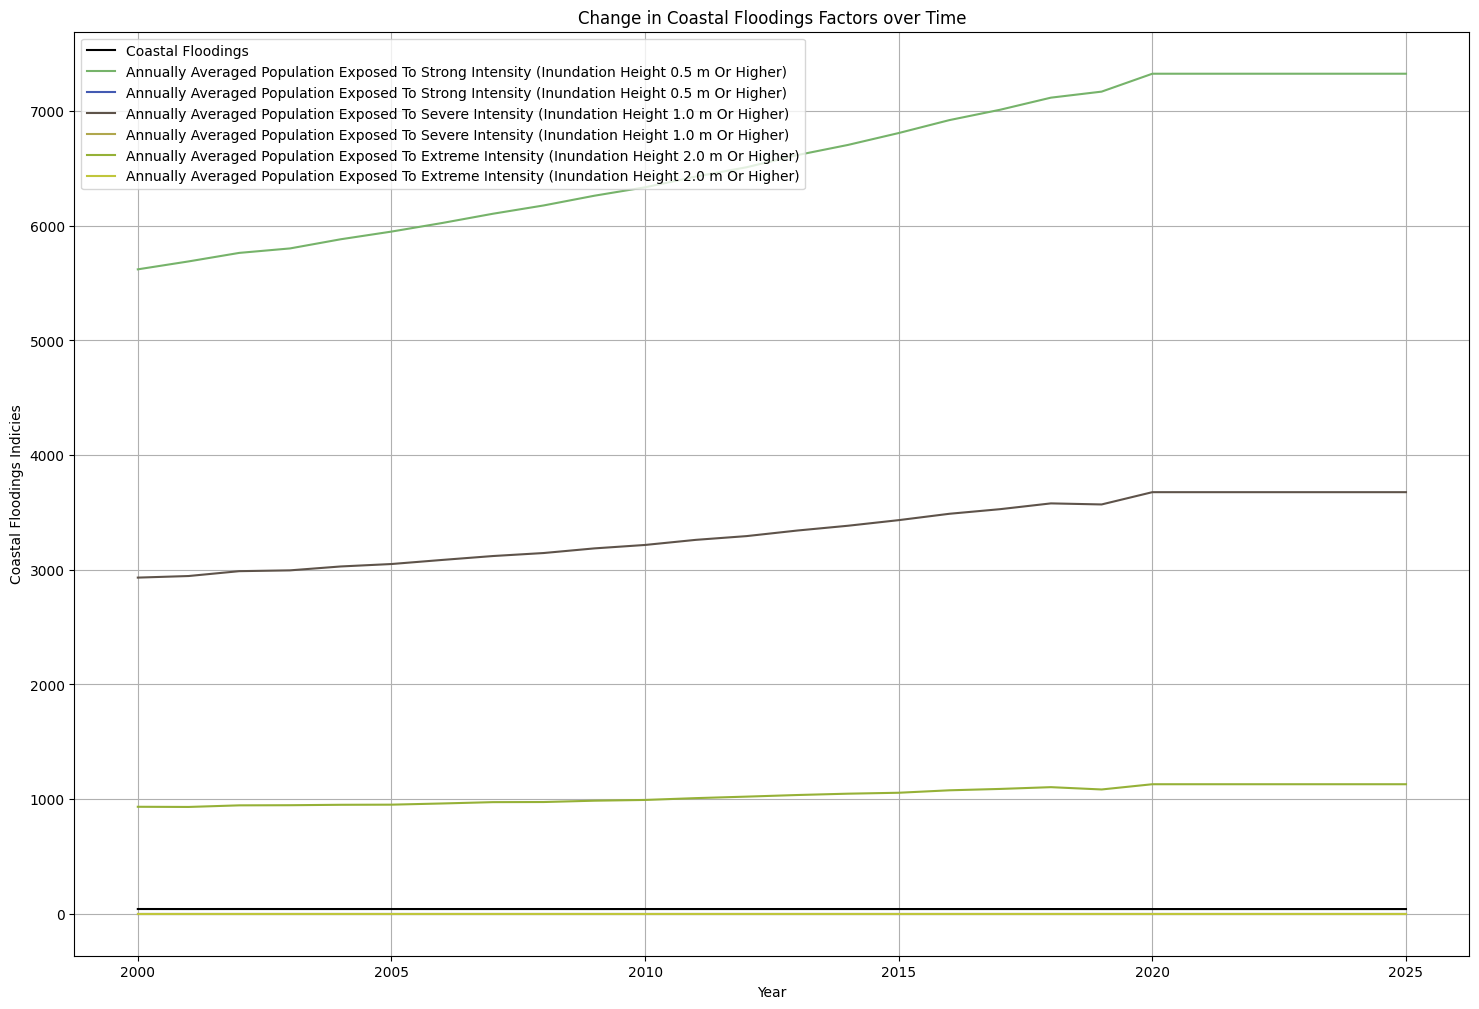

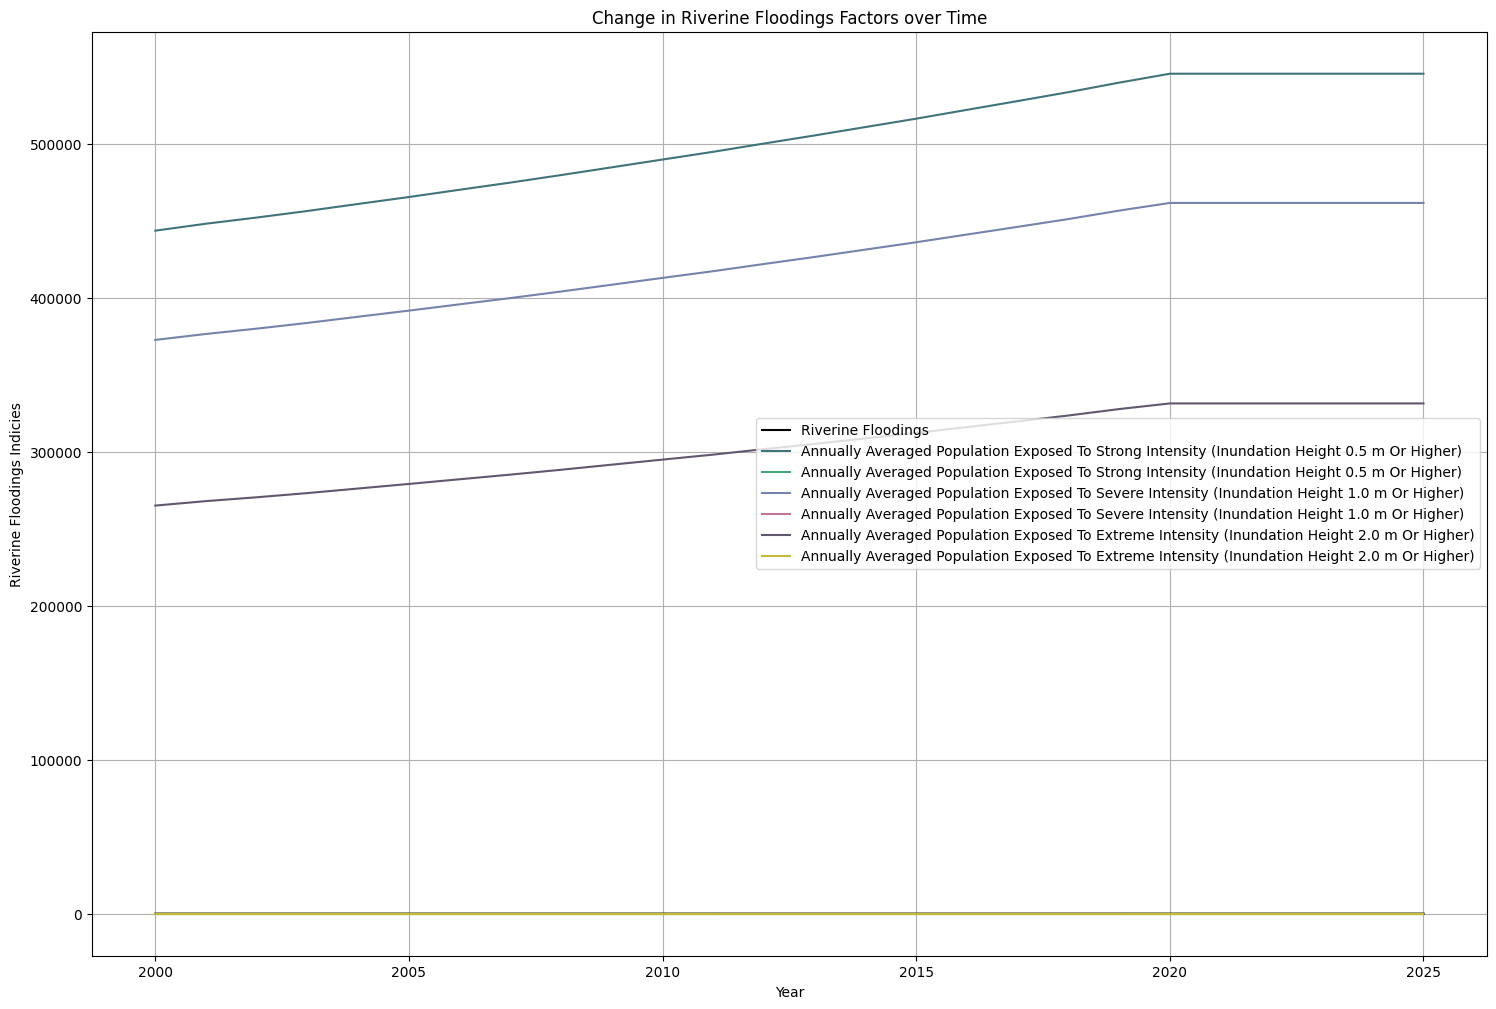

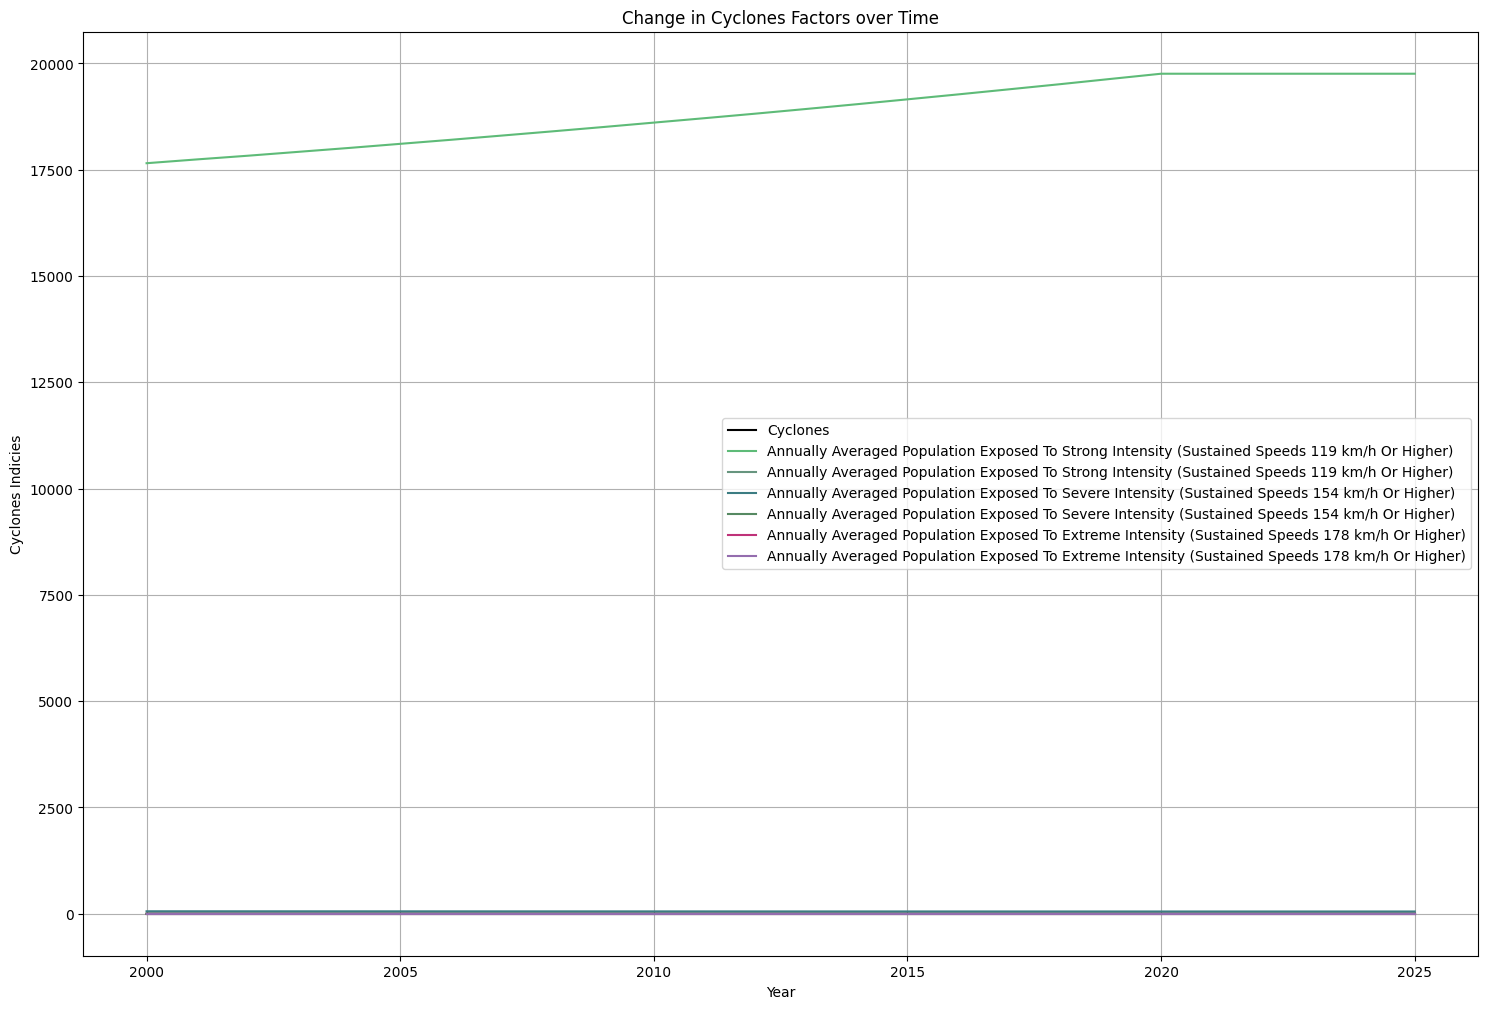

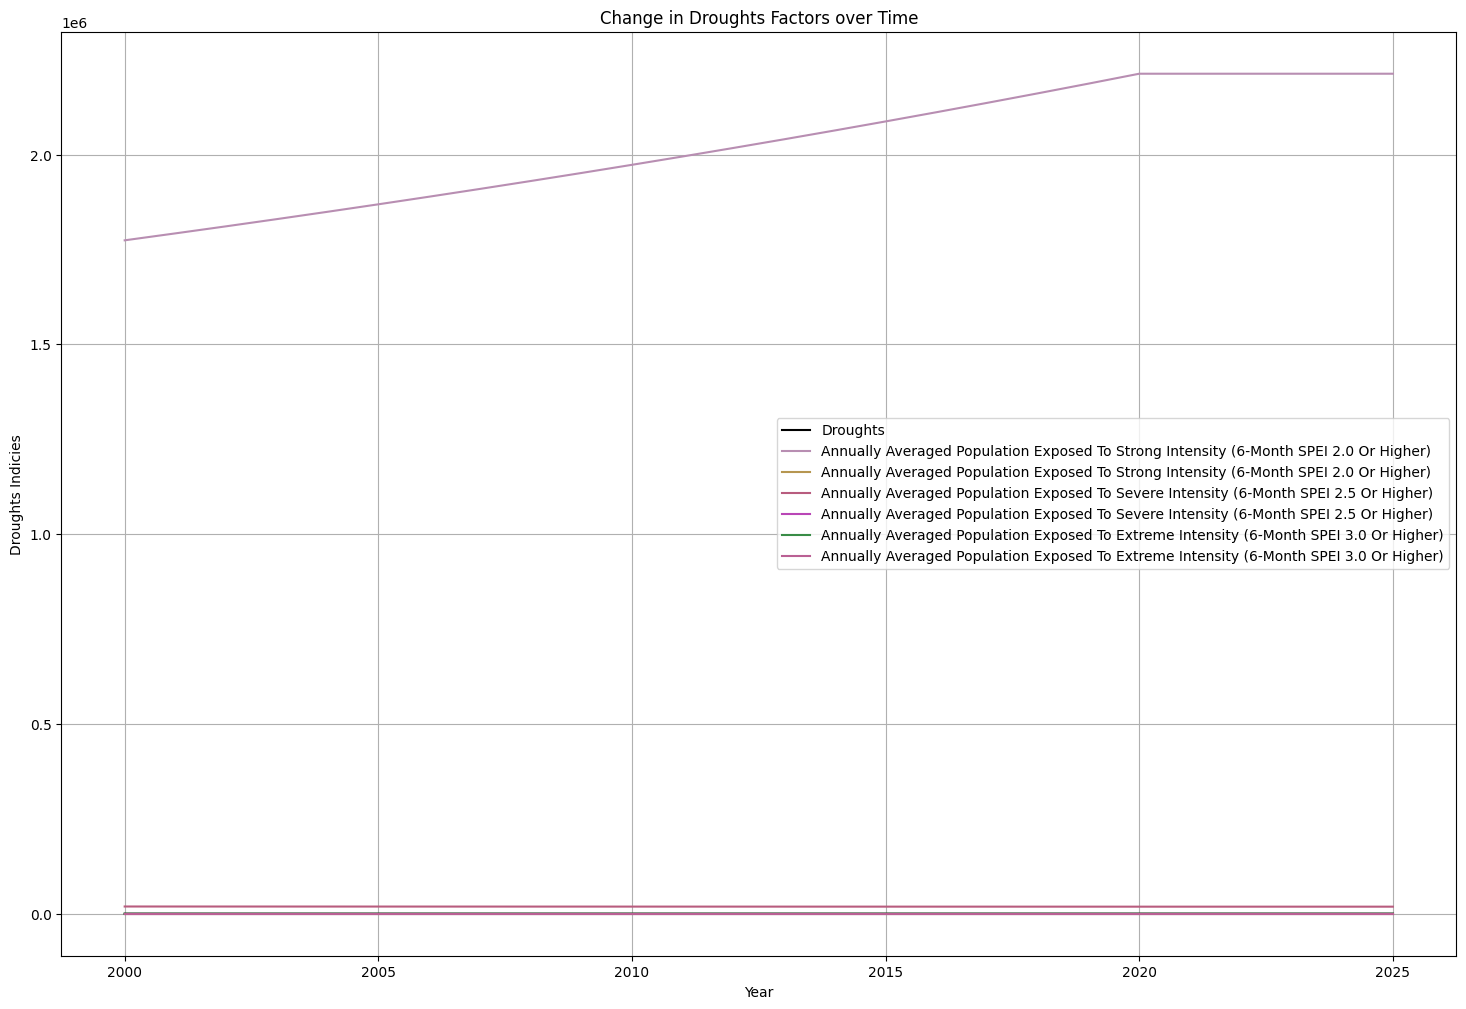

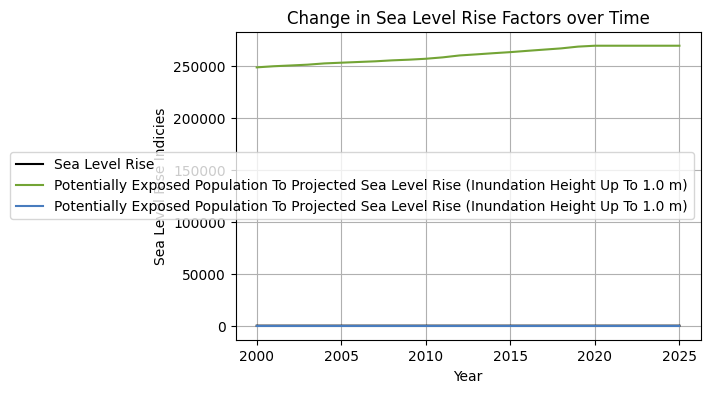

In [91]:
exposureSubcat = generateSubcatName(["EI"], [7])[0]
categoryLength = [6,6,6,6,6,6,2]

plotSubcategoriesB(exposureSubcat, categoryLength)

In [58]:
countries = pd.read_csv("countries of the world.csv")
countries.isna().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

In [54]:
countries.head()

Country                               Region  Population  \
0     Afghanistan         ASIA (EX. NEAR EAST)             31056997   
1         Albania   EASTERN EUROPE                          3581655   
2         Algeria   NORTHERN AFRICA                        32930091   
3  American Samoa   OCEANIA                                   57794   
4         Andorra   WESTERN EUROPE                            71201   

   Area (sq. mi.) Pop. Density (per sq. mi.) Coastline (coast/area ratio)  \
0          647500                       48,0                         0,00   
1           28748                      124,6                         1,26   
2         2381740                       13,8                         0,04   
3             199                      290,4                        58,29   
4             468                      152,1                         0,00   

  Net migration Infant mortality (per 1000 births)  GDP ($ per capita)  \
0         23,06                             163,07               700.0   
1         -4,93                              21,52              4500.0   
2         -0,39                                 31              6000.0   
3        -20,71                               9,27              8000.0   
4           6,6                               4,05             19000.0   

  Literacy (%) Phones (per 1000) Arable (%) Crops (%) Other (%) Climate  \
0         36,0               3,2      12,13      0,22     87,65       1   
1         86,5              71,2      21,09      4,42     74,49       3   
2         70,0              78,1       3,22      0,25     96,53       1   
3         97,0             259,5         10        15        75       2   
4        100,0             497,2       2,22         0     97,78       3   

  Birthrate Deathrate Agriculture Industry Service  
0      46,6     20,34        0,38     0,24    0,38  
1     15,11      5,22       0,232    0,188   0,579  
2     17,14      4,61       0,101      0,6   0,298  
3     22,46      3,27         NaN      NaN     NaN  
4      8,71      6,25         NaN      NaN     NaN

In [55]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    object 
 5   Coastline (coast/area ratio)        227 non-null    object 
 6   Net migration                       224 non-null    object 
 7   Infant mortality (per 1000 births)  224 non-null    object 
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    object 
 10  Phones (per 1000)                   223 non-null    object 
 11  Arable (%)                          225 non-n

Why are they objects...

There are commas in the numbers...

In [26]:
countries.describe()

Population  Area (sq. mi.)  GDP ($ per capita)
count  2.270000e+02    2.270000e+02          226.000000
mean   2.874028e+07    5.982270e+05         9689.823009
std    1.178913e+08    1.790282e+06        10049.138513
min    7.026000e+03    2.000000e+00          500.000000
25%    4.376240e+05    4.647500e+03         1900.000000
50%    4.786994e+06    8.660000e+04         5550.000000
75%    1.749777e+07    4.418110e+05        15700.000000
max    1.313974e+09    1.707520e+07        55100.000000

In [59]:
code = pd.Series(range(len(countries)), dtype="string")
listOfNoGoods = []

for i in range(len(countries)):
  country = countries.Country[i]
  replaced = country.replace("&", "and")
  filtered = replaced.split(",")[0]

  try:
    res = pycountry.countries.search_fuzzy(filtered)
    code[i] = res[0].alpha_3
  except:
    code[i] = pd.NA
    listOfNoGoods.append(country)

print(listOfNoGoods)
print(len(listOfNoGoods))

countries.insert(1, "ISO3", code)
countries.head()

['British Virgin Is. ', 'Burma ', 'Cape Verde ', 'Central African Rep. ', 'East Timor ', 'Gaza Strip ', 'Macau ', 'Netherlands Antilles ', 'N. Mariana Islands ', 'St Pierre & Miquelon ', 'Swaziland ', 'Turkey ', 'West Bank ']
13


Country ISO3                               Region  Population  \
0     Afghanistan   AFG        ASIA (EX. NEAR EAST)             31056997   
1         Albania   ALB  EASTERN EUROPE                          3581655   
2         Algeria   DZA  NORTHERN AFRICA                        32930091   
3  American Samoa   ASM  OCEANIA                                   57794   
4         Andorra   AND  WESTERN EUROPE                            71201   

   Area (sq. mi.) Pop. Density (per sq. mi.) Coastline (coast/area ratio)  \
0          647500                       48,0                         0,00   
1           28748                      124,6                         1,26   
2         2381740                       13,8                         0,04   
3             199                      290,4                        58,29   
4             468                      152,1                         0,00   

  Net migration Infant mortality (per 1000 births)  GDP ($ per capita)  ...  \
0         23,06                             163,07               700.0  ...   
1         -4,93                              21,52              4500.0  ...   
2         -0,39                                 31              6000.0  ...   
3        -20,71                               9,27              8000.0  ...   
4           6,6                               4,05             19000.0  ...   

  Phones (per 1000) Arable (%) Crops (%) Other (%) Climate Birthrate  \
0               3,2      12,13      0,22     87,65       1      46,6   
1              71,2      21,09      4,42     74,49       3     15,11   
2              78,1       3,22      0,25     96,53       1     17,14   
3             259,5         10        15        75       2     22,46   
4             497,2       2,22         0     97,78       3      8,71   

  Deathrate Agriculture Industry Service  
0     20,34        0,38     0,24    0,38  
1      5,22       0,232    0,188   0,579  
2      4,61       0,101      0,6   0,298  
3      3,27         NaN      NaN     NaN  
4      6,25         NaN      NaN     NaN  

[5 rows x 21 columns]

In [62]:
missingCodes = ['VGB', 'MMR', 'CPV', 'CAF', 'TLS','PSE','MAC','ANT','MNP','SPM','SWZ','TUR','PSE']

for i in range(len(listOfNoGoods)):
  missing = listOfNoGoods[i]
  countries.loc[countries['Country'] == missing, 'ISO3'] = missingCodes[i]


In [63]:
countries['Country'] = countries['Country'].astype('string').str.strip()
countries['Region'] = countries['Region'].astype('string').str.strip()

for col in countries.select_dtypes(include='object').columns:
    countries[col] = countries[col].astype('string').str.replace(",", ".").str.strip()
    countries[col] = countries[col].astype('float')

countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    string 
 1   ISO3                                227 non-null    string 
 2   Region                              227 non-null    string 
 3   Population                          227 non-null    int64  
 4   Area (sq. mi.)                      227 non-null    int64  
 5   Pop. Density (per sq. mi.)          227 non-null    float64
 6   Coastline (coast/area ratio)        227 non-null    float64
 7   Net migration                       224 non-null    float64
 8   Infant mortality (per 1000 births)  224 non-null    float64
 9   GDP ($ per capita)                  226 non-null    float64
 10  Literacy (%)                        209 non-null    float64
 11  Phones (per 1000)                   223 non-n

In [64]:
colNoErrors = ['Country','ISO3','Region', 'Population', 'Area (sq. mi.)', 'Pop. Density (per sq. mi.)','Coastline (coast/area ratio)']
colErr = countries.loc[:, ~countries.columns.isin(colNoErrors)].columns

regions = countries['Region'].unique()

for i in range(len(regions)):
  region = regions[i]
  countriesInRegion = countries[countries['Region'] == region]

  for j in colErr:
    col = countriesInRegion[j]
    na = col.isna().sum()
    sum =  col.sum()
    mean = sum/(len(col)-na)
    countries.loc[countries['Region'] == region, j] = countries.loc[countries['Region'] == region, j].fillna(mean)

#countries.dropna(subset=['ISO3'], inplace=True) # Not sure what to do about these

countries.isna().sum()

Country                               0
ISO3                                  0
Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         0
Infant mortality (per 1000 births)    0
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     0
Arable (%)                            0
Crops (%)                             0
Other (%)                             0
Climate                               0
Birthrate                             0
Deathrate                             0
Agriculture                           0
Industry                              0
Service                               0
dtype: int64

In [65]:
print(((countries['Crops (%)'] + countries['Arable (%)'] + countries['Other (%)']) > 100).sum()) # ConsistencyCheck
print(((countries['Agriculture'] + countries['Industry'] + countries['Service']) > 1).sum()) # ConsistencyCheck
print(((countries['Crops (%)'] + countries['Arable (%)'] + countries['Other (%)']) > 101).sum()) # ConsistencyCheck
print(((countries['Agriculture'] + countries['Industry'] + countries['Service']) > 1.01).sum()) # ConsistencyCheck
print((countries['Country'].value_counts().sort_values(ascending=False)-1).sum()) # UniquenessCheck
print((countries['ISO3'].value_counts().sort_values(ascending=False)-1).sum()) # UniquenessCheck

5
26
0
1
0
5


In [52]:
countries[countries['Agriculture'] + countries['Industry'] + countries['Service'] > 1.01] # Uhhhh, what do I do here...


Country ISO3          Region  Population  Area (sq. mi.)  \
138  Monaco  MCO  WESTERN EUROPE       32543               2   

     Pop. Density (per sq. mi.)  Coastline (coast/area ratio)  Net migration  \
138                     16271.5                         205.0           7.75   

     Infant mortality (per 1000 births)  GDP ($ per capita)  ...  \
138                                5.43             27000.0  ...   

     Phones (per 1000)  Arable (%)  Crops (%)  Other (%)   Climate  Birthrate  \
138             1035.6         0.0        0.0      100.0  3.095238       9.19   

     Deathrate  Agriculture  Industry   Service  
138      12.91         0.17  0.246083  0.714625  

[1 rows x 21 columns]

In [74]:
theOffender = countries.loc[countries['Country'] == 'Monaco']
difference = theOffender['Agriculture']+theOffender["Industry"]+theOffender["Service"] - 1
countries.loc[countries['Country'] == 'Monaco', 'Agriculture'] = theOffender['Agriculture'] - difference/3
countries.loc[countries['Country'] == 'Monaco', 'Industry'] = theOffender['Industry'] - difference/3
countries.loc[countries['Country'] == 'Monaco', 'Service'] = theOffender['Service'] - difference/3

In [66]:
countries['ISO3'].value_counts().sort_values(ascending=False) - 1

ISO3
VGB    1
COG    1
PSE    1
PRK    1
NGA    1
      ..
WLF    0
ESH    0
YEM    0
ZMB    0
ZWE    0
Name: count, Length: 222, dtype: Int64

In [68]:
countries.loc[countries['Country'] == 'Niger', 'ISO3'] = 'NER'
countries.loc[countries['Country'] == 'Korea, South', 'ISO3'] = 'KOR'
countries.loc[countries['Country'] == 'Congo, Dem. Rep.', 'ISO3'] = 'COD'

In [35]:
countries.describe()

Population  Area (sq. mi.)  Pop. Density (per sq. mi.)  \
count  2.140000e+02    2.140000e+02                  214.000000   
mean   2.988153e+07    6.246307e+05                  301.310748   
std    1.212265e+08    1.839370e+06                 1296.679856   
min    7.502000e+03    2.000000e+00                    0.000000   
25%    4.581852e+05    1.054775e+04                   27.525000   
50%    5.445054e+06    9.234550e+04                   77.400000   
75%    1.836031e+07    4.441805e+05                  187.250000   
max    1.313974e+09    1.707520e+07                16271.500000   

       Coastline (coast/area ratio)  Net migration  \
count                    214.000000     214.000000   
mean                      19.470421      -0.027725   
std                       71.080873       4.815526   
min                        0.000000     -20.990000   
25%                        0.100000      -1.032500   
50%                        0.705000       0.000000   
75%                        8.607500       0.927500   
max                      870.660000      23.060000   

       Infant mortality (per 1000 births)  GDP ($ per capita)  Literacy (%)  \
count                          214.000000          214.000000    214.000000   
mean                            35.380763         9866.168224     83.389341   
std                             35.623948        10185.474481     19.508911   
min                              2.290000          500.000000     17.600000   
25%                              8.202500         1925.000000     74.350000   
50%                             20.940000         5550.000000     92.500000   
75%                             55.422500        16450.000000     98.000000   
max                            191.190000        55100.000000    100.000000   

       Phones (per 1000)  Arable (%)   Crops (%)   Other (%)     Climate  \
count         214.000000  214.000000  214.000000  214.000000  214.000000   
mean          234.375115   13.818594    4.556512   81.624522    2.165355   
std           228.132829   13.197755    8.403747   16.182396    0.712089   
min             0.200000    0.000000    0.000000   33.330000    1.000000   
25%            38.450000    3.122500    0.195000   71.817500    2.000000   
50%           170.150000   10.475000    1.160000   85.340000    2.000000   
75%           391.025000   20.000000    4.437500   95.485000    3.000000   
max          1035.600000   62.110000   50.680000  100.000000    4.000000   

       Birthrate   Deathrate  Agriculture    Industry     Service  
count  214.00000  214.000000   214.000000  214.000000  214.000000  
mean    22.04235    9.244727     0.149561    0.284004    0.566450  
std     11.25551    4.781762     0.140900    0.134425    0.159686  
min      7.29000    2.410000     0.000000    0.020000    0.062000  
25%     12.24500    5.882500     0.040000    0.200000    0.441750  
50%     18.79000    8.175000     0.099500    0.264439    0.577000  
75%     29.78500   10.612500     0.219250    0.340000    0.677500  
max     50.73000   29.500000     0.769000    0.906000    0.954000

Min and Max looks sane.

/tmp/ipython-input-1858379378.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(toPlot, labels=regions)


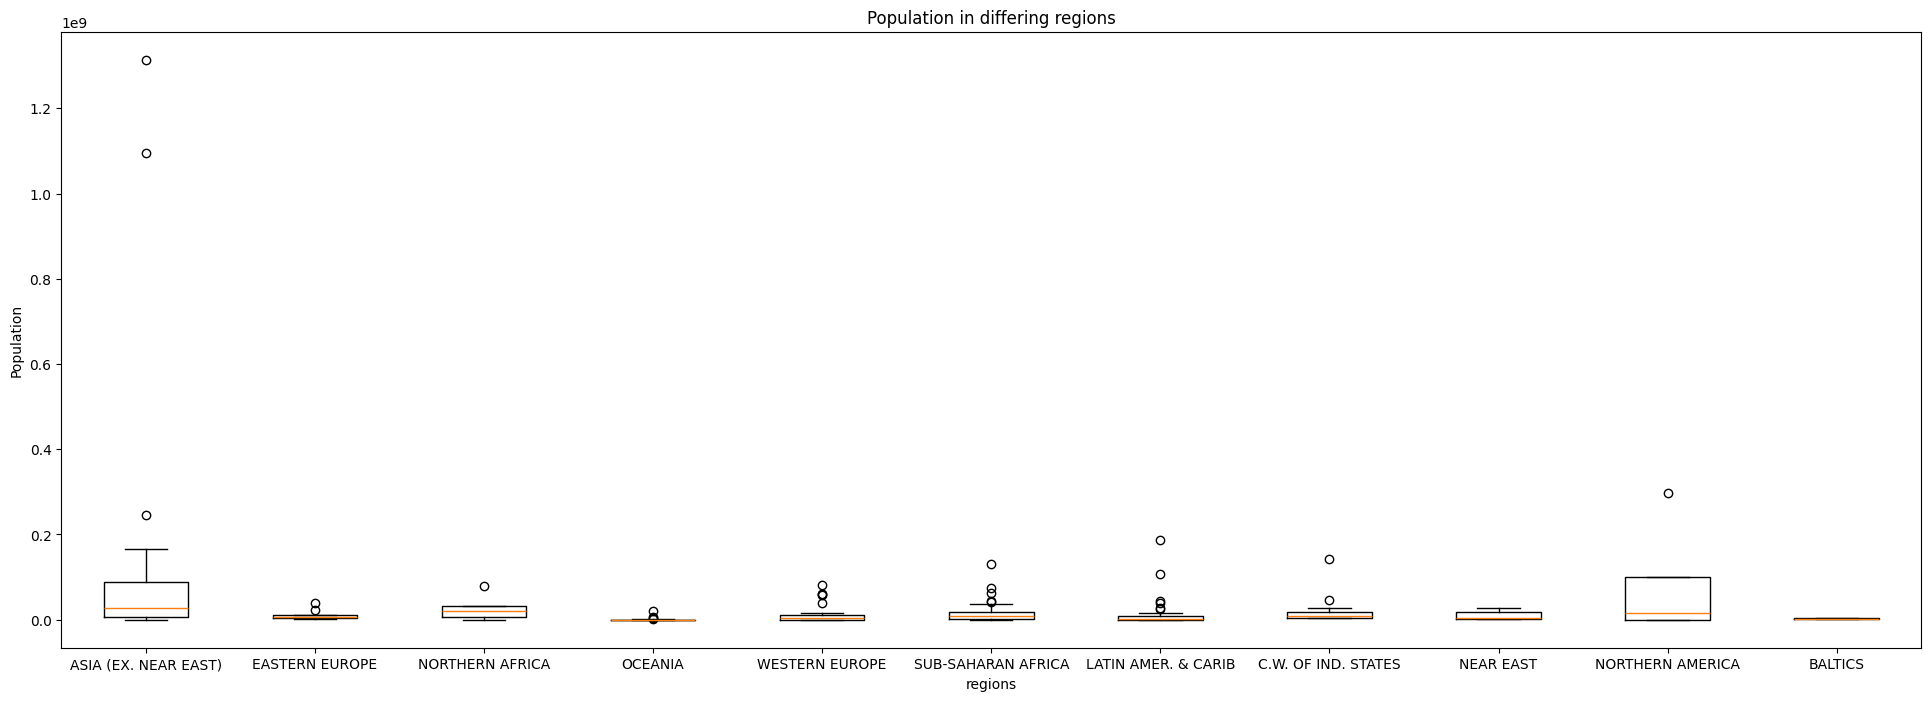

/tmp/ipython-input-1858379378.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(toPlot, labels=regions)


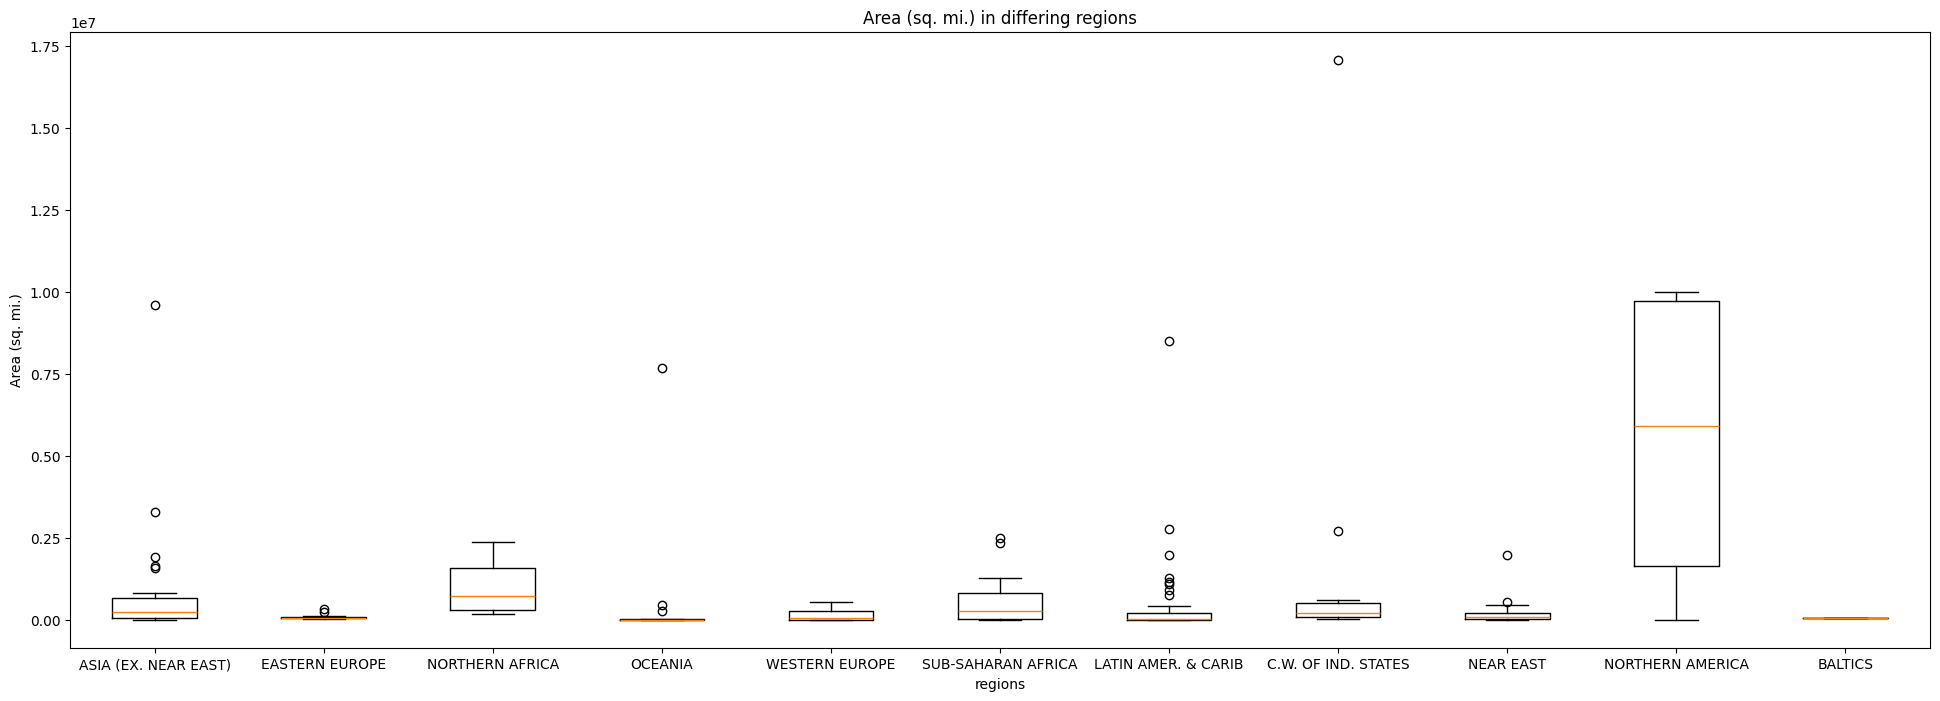

/tmp/ipython-input-1858379378.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(toPlot, labels=regions)


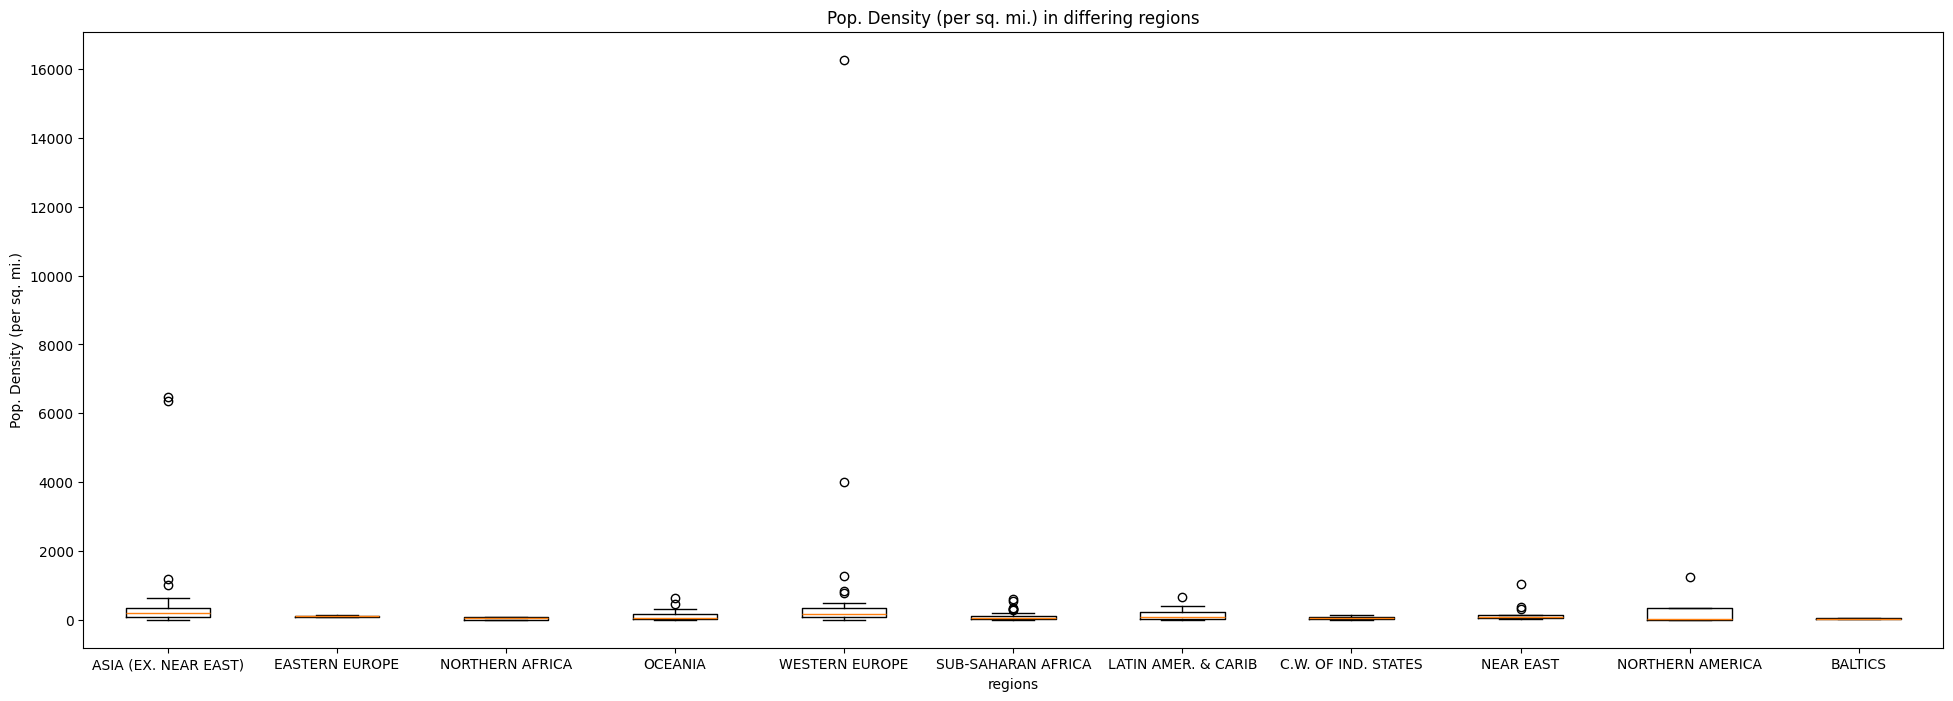

/tmp/ipython-input-1858379378.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(toPlot, labels=regions)


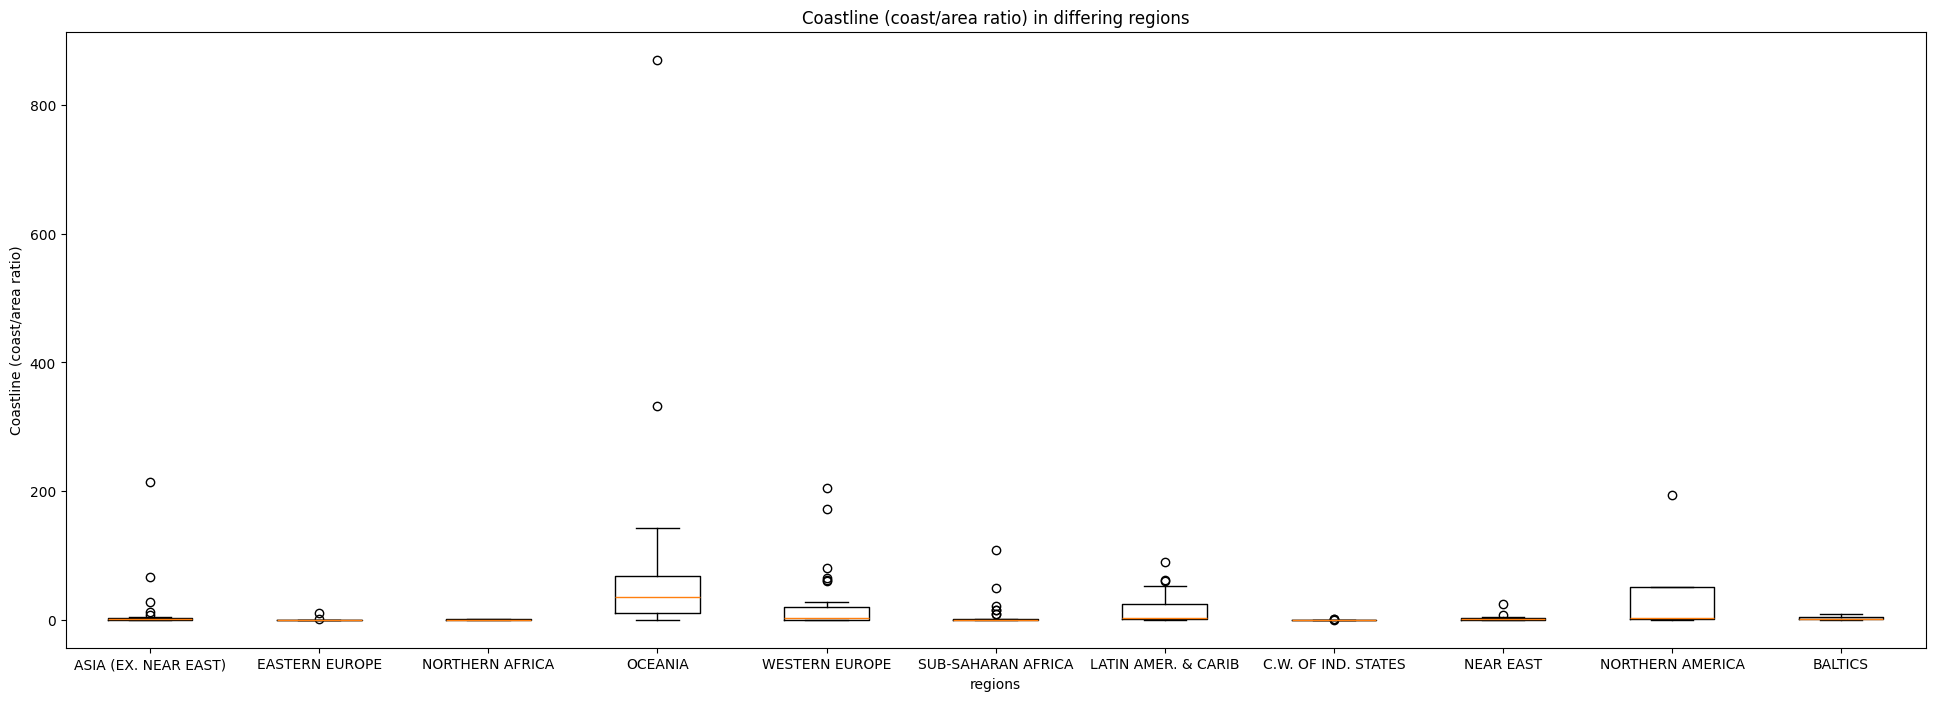

/tmp/ipython-input-1858379378.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(toPlot, labels=regions)


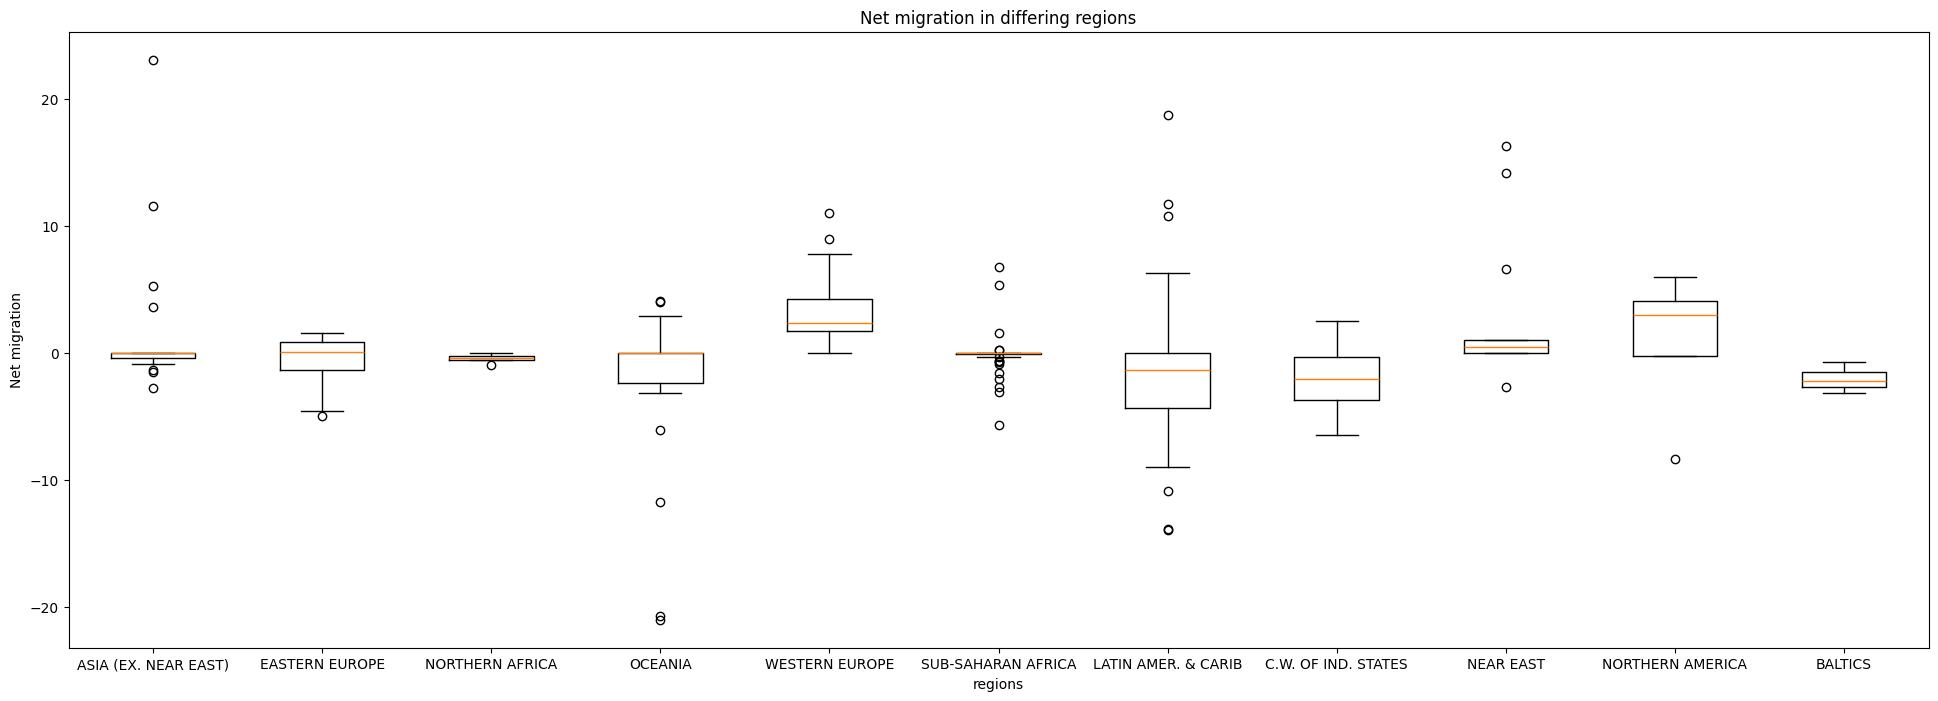

/tmp/ipython-input-1858379378.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(toPlot, labels=regions)


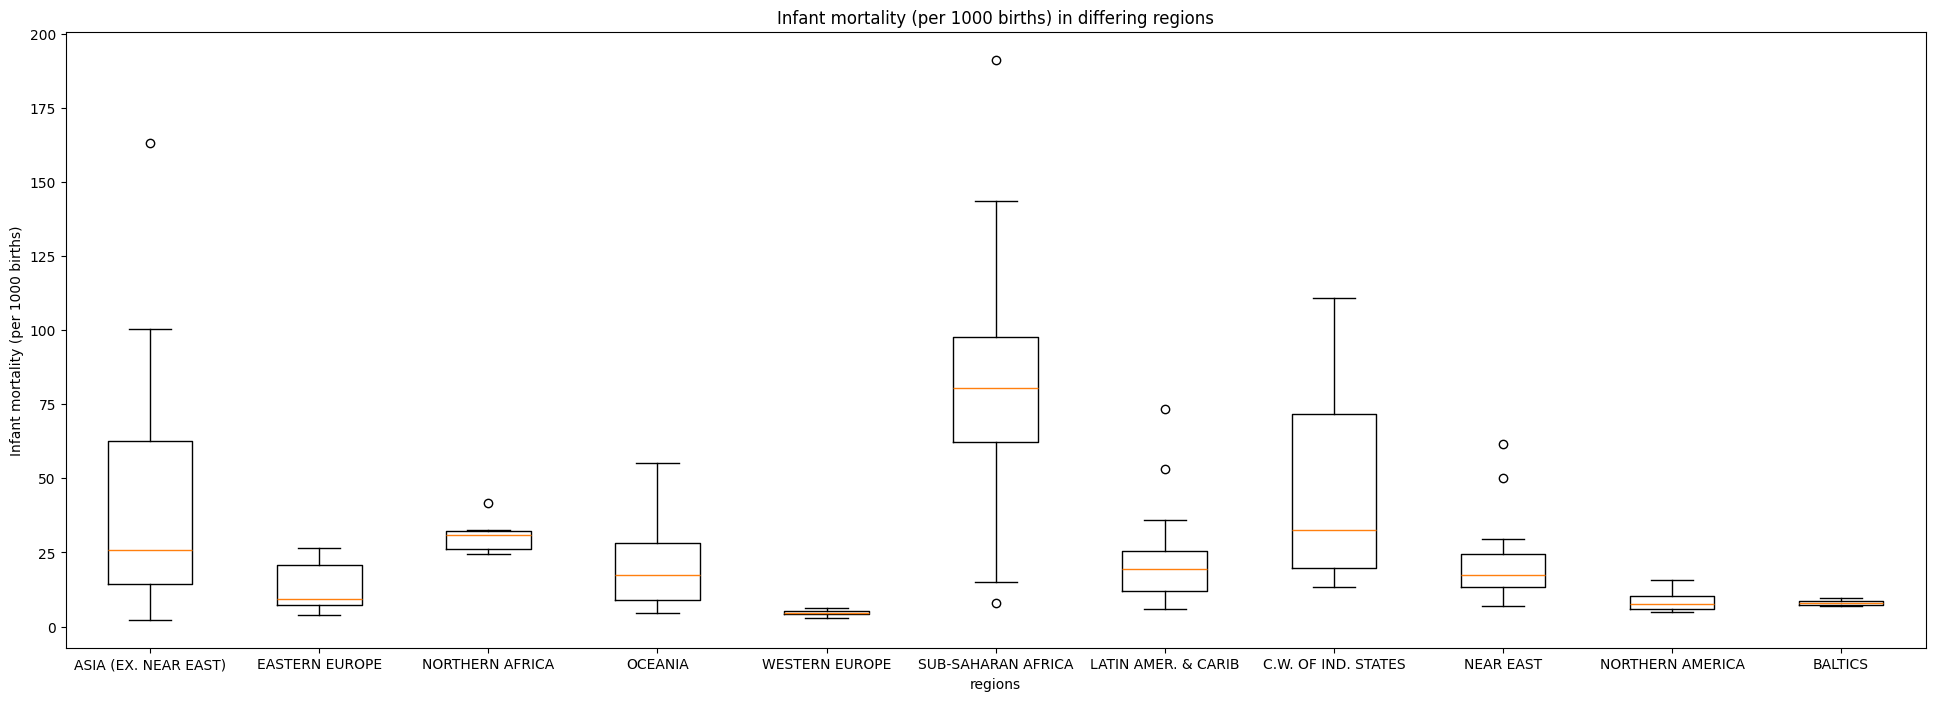

/tmp/ipython-input-1858379378.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(toPlot, labels=regions)


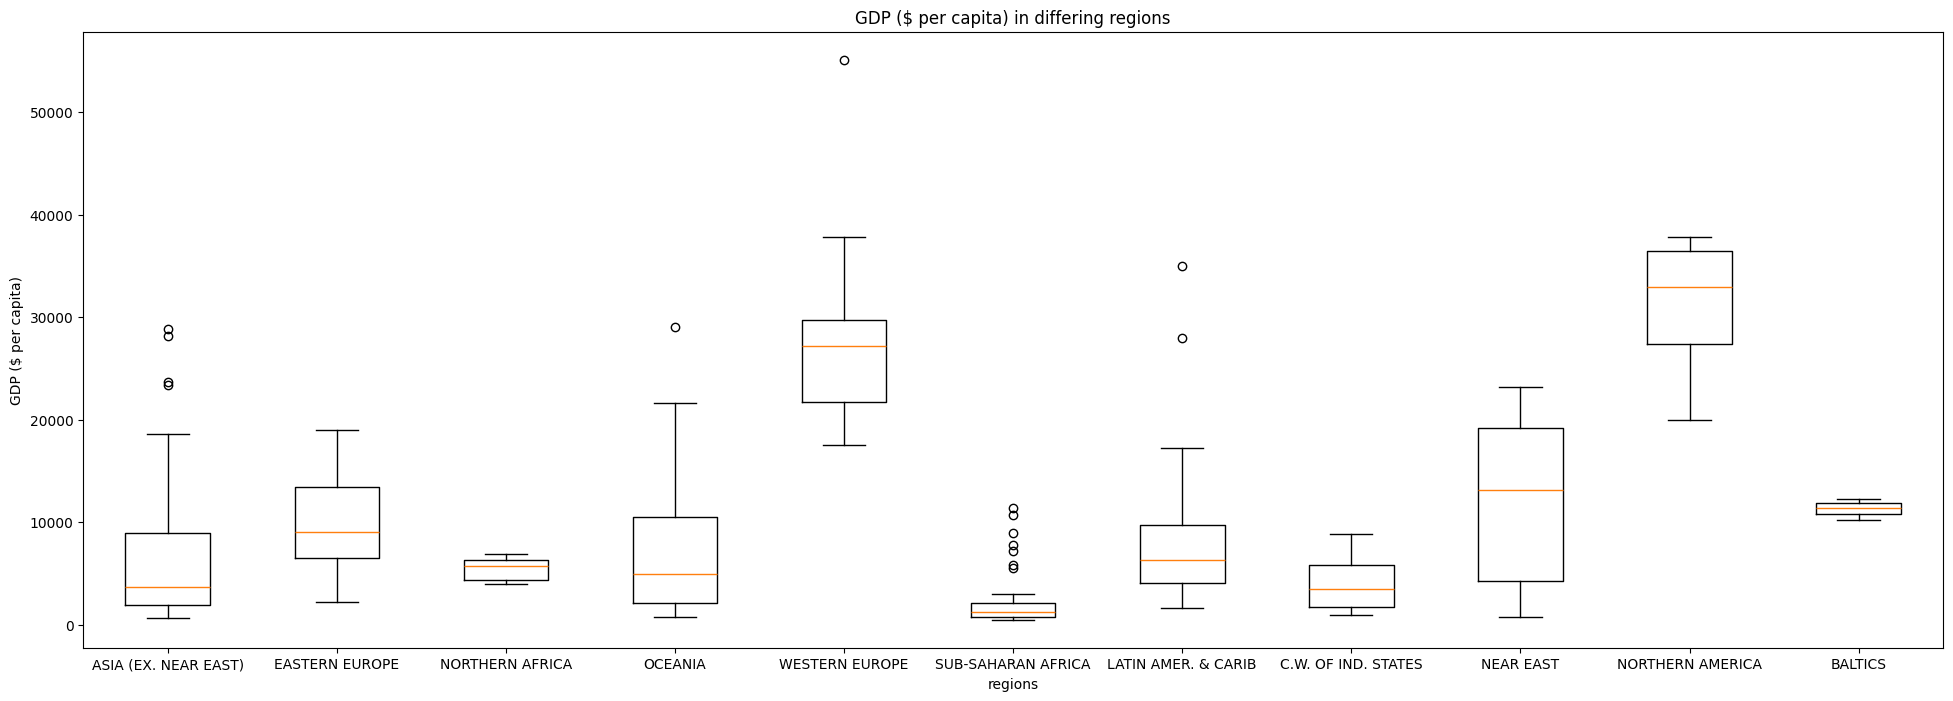

/tmp/ipython-input-1858379378.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(toPlot, labels=regions)


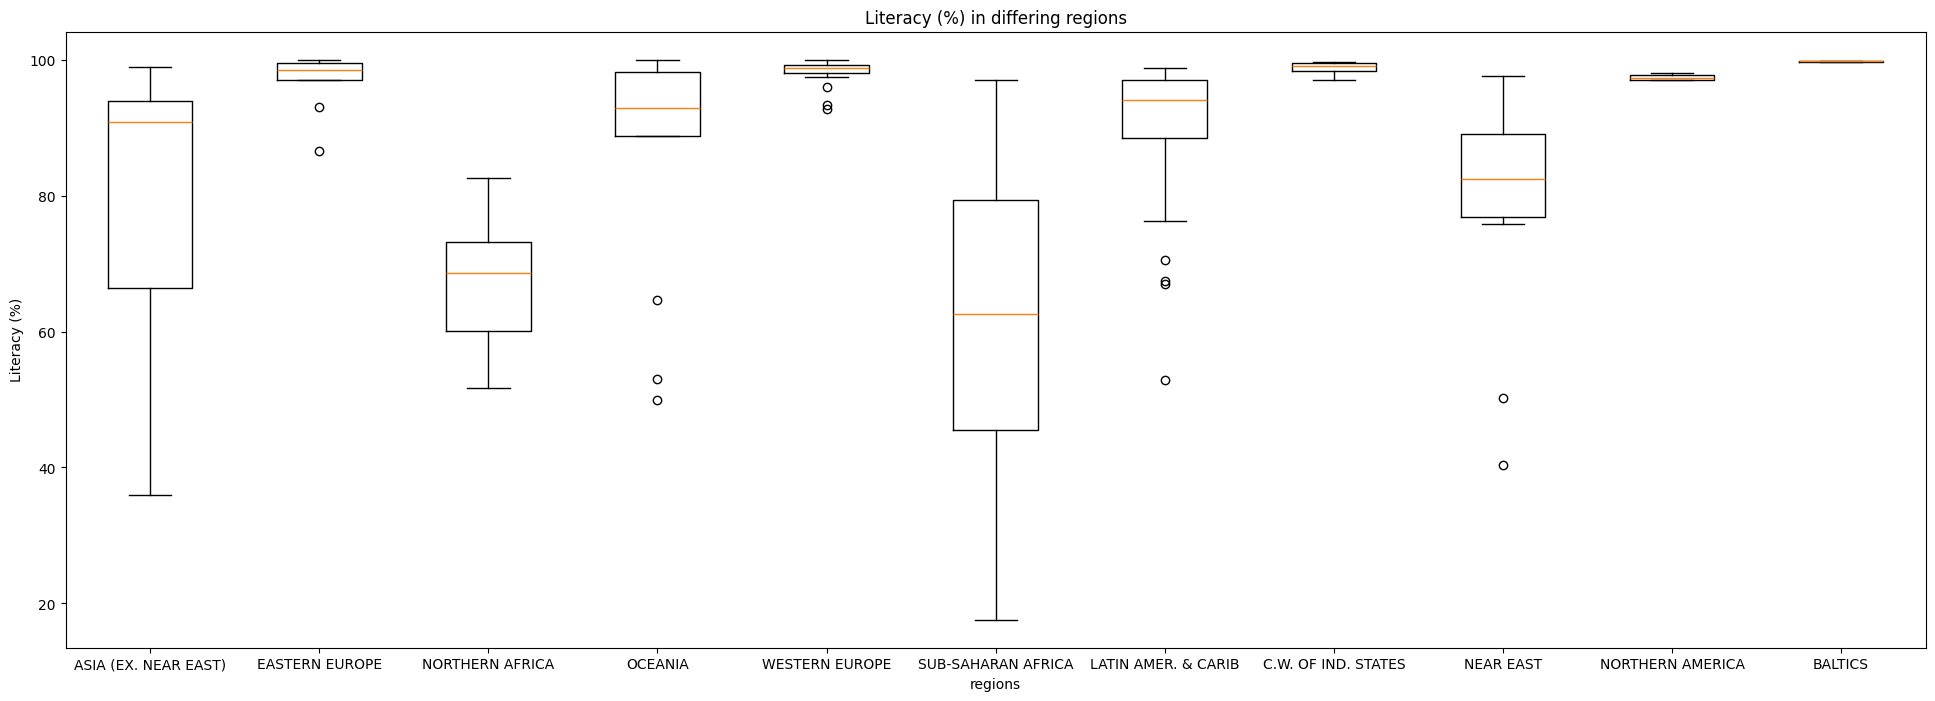

/tmp/ipython-input-1858379378.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(toPlot, labels=regions)


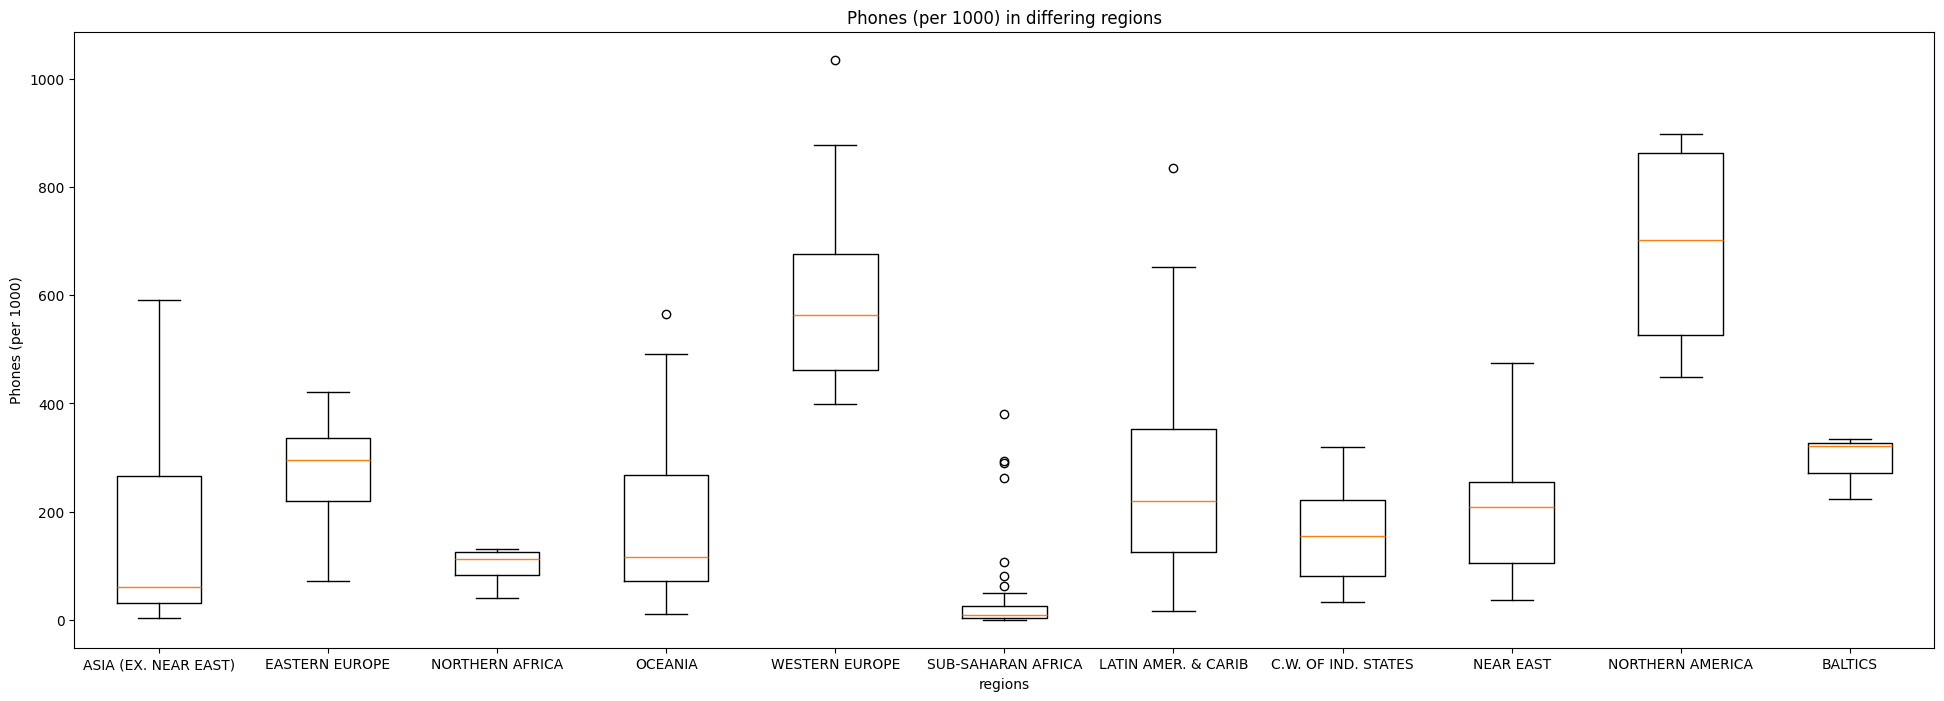

/tmp/ipython-input-1858379378.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(toPlot, labels=regions)


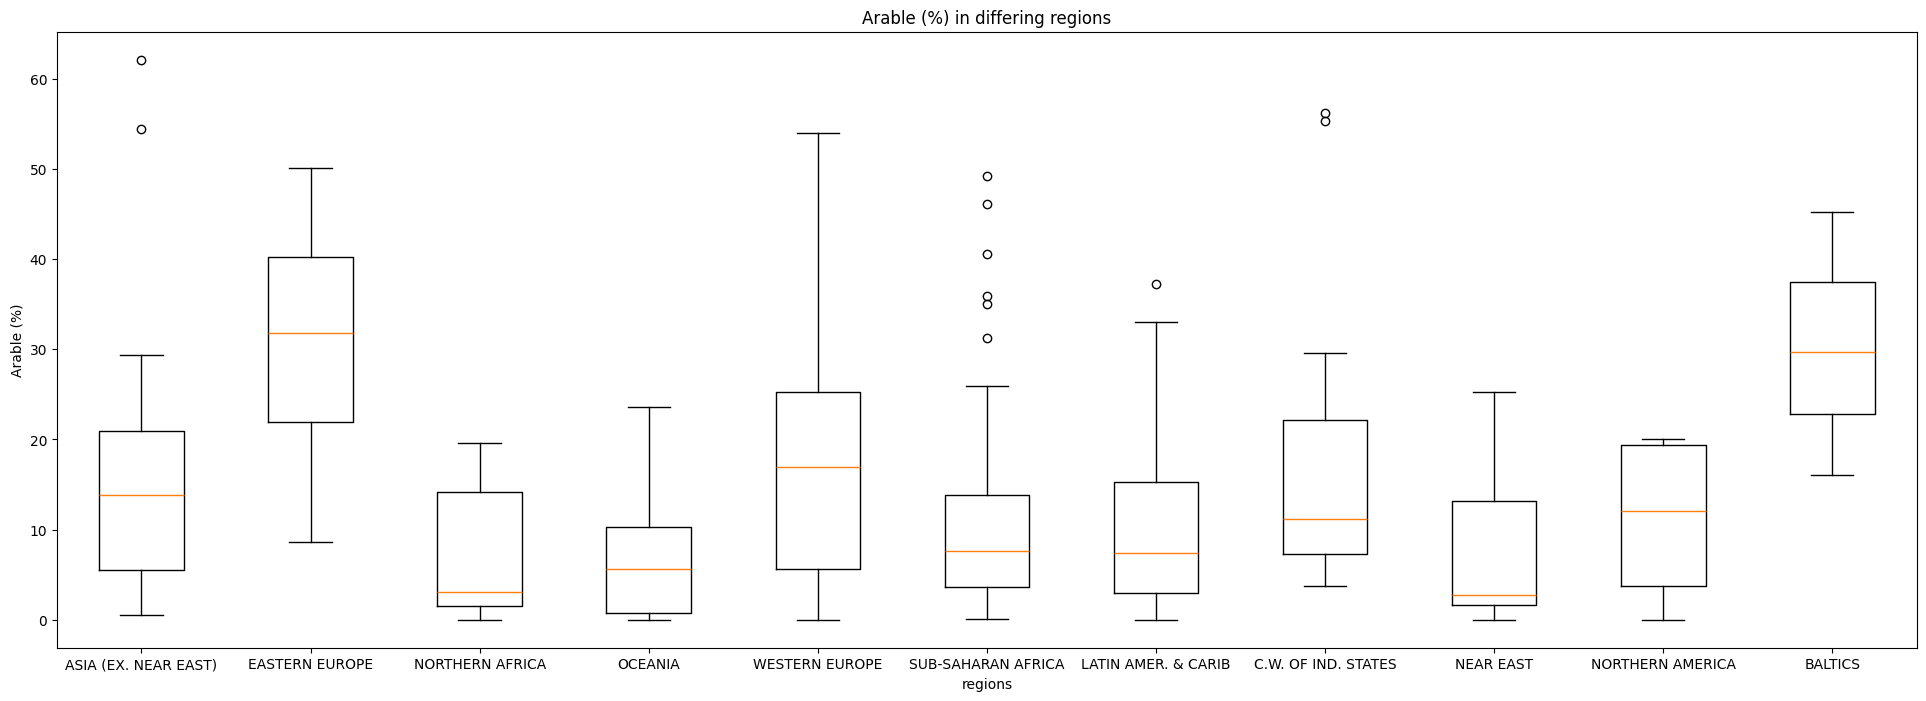

/tmp/ipython-input-1858379378.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(toPlot, labels=regions)


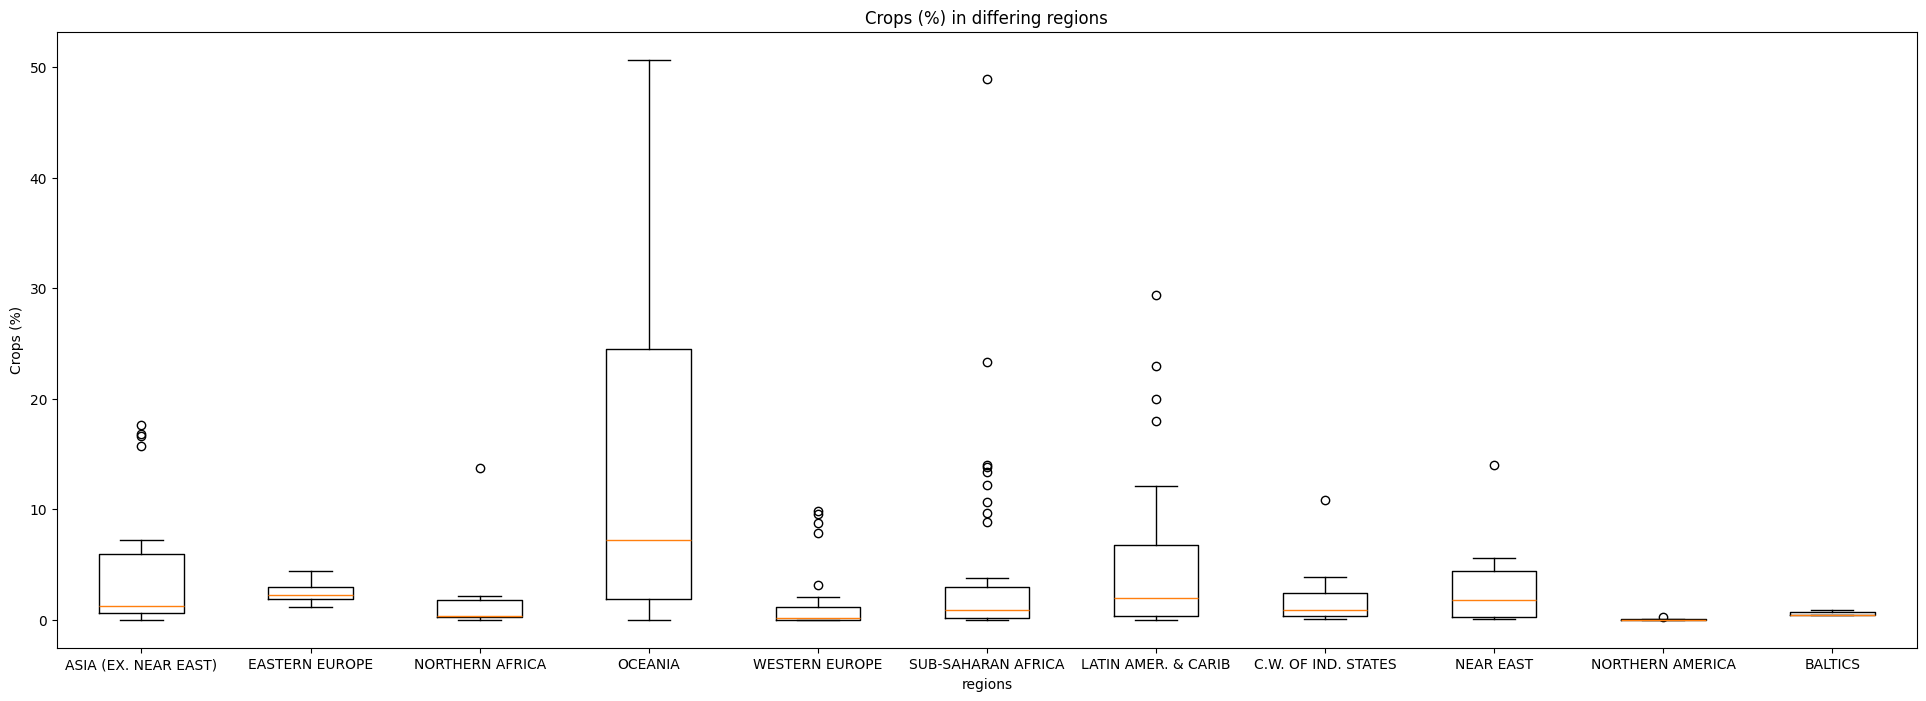

/tmp/ipython-input-1858379378.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(toPlot, labels=regions)


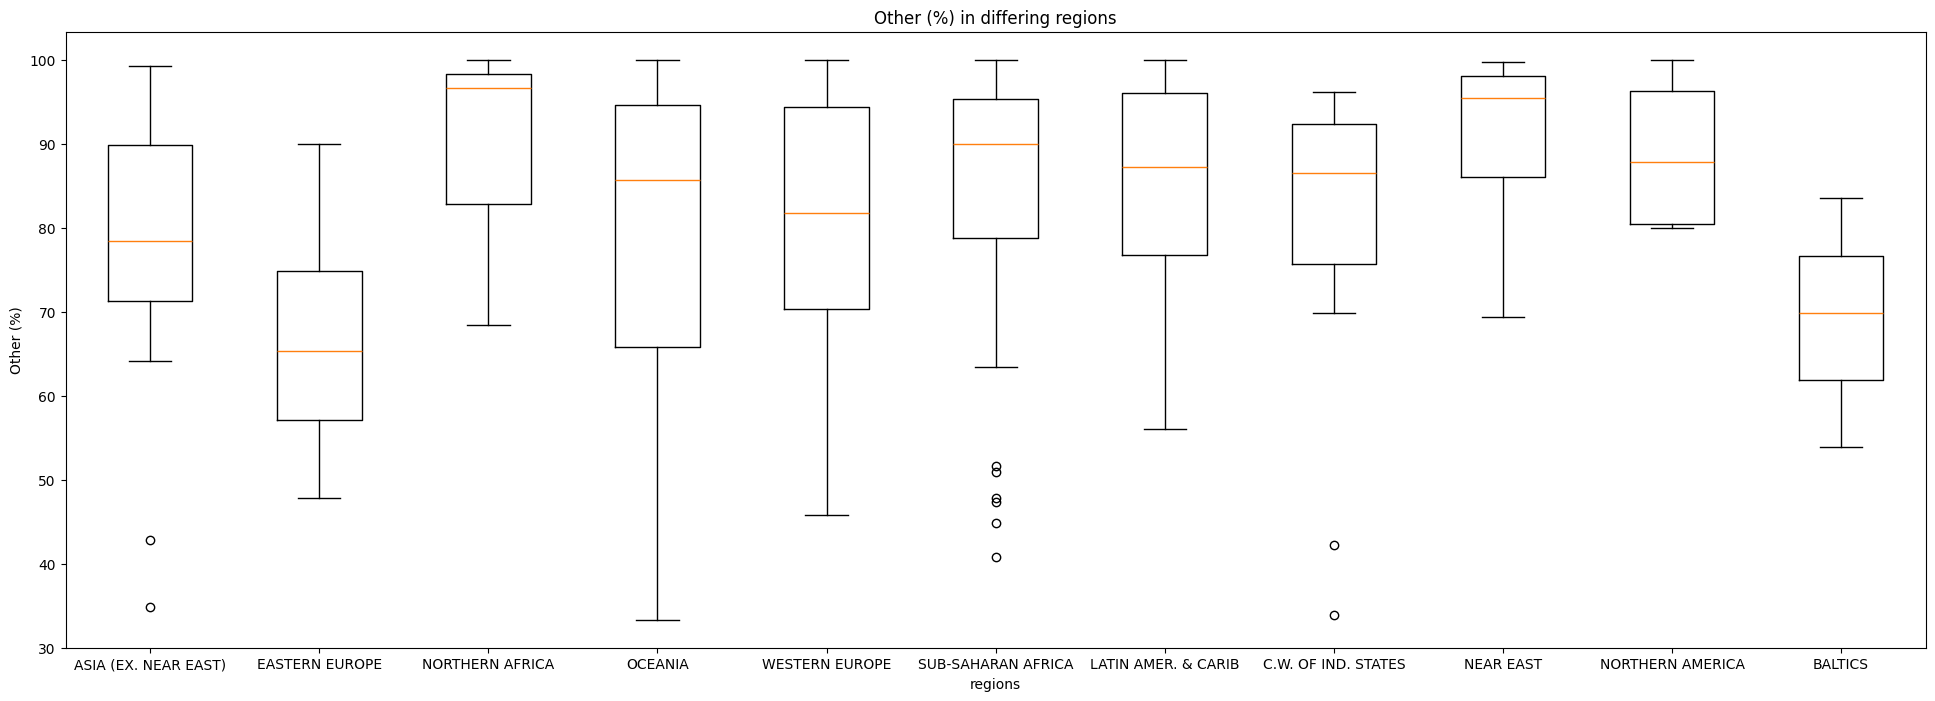

/tmp/ipython-input-1858379378.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(toPlot, labels=regions)


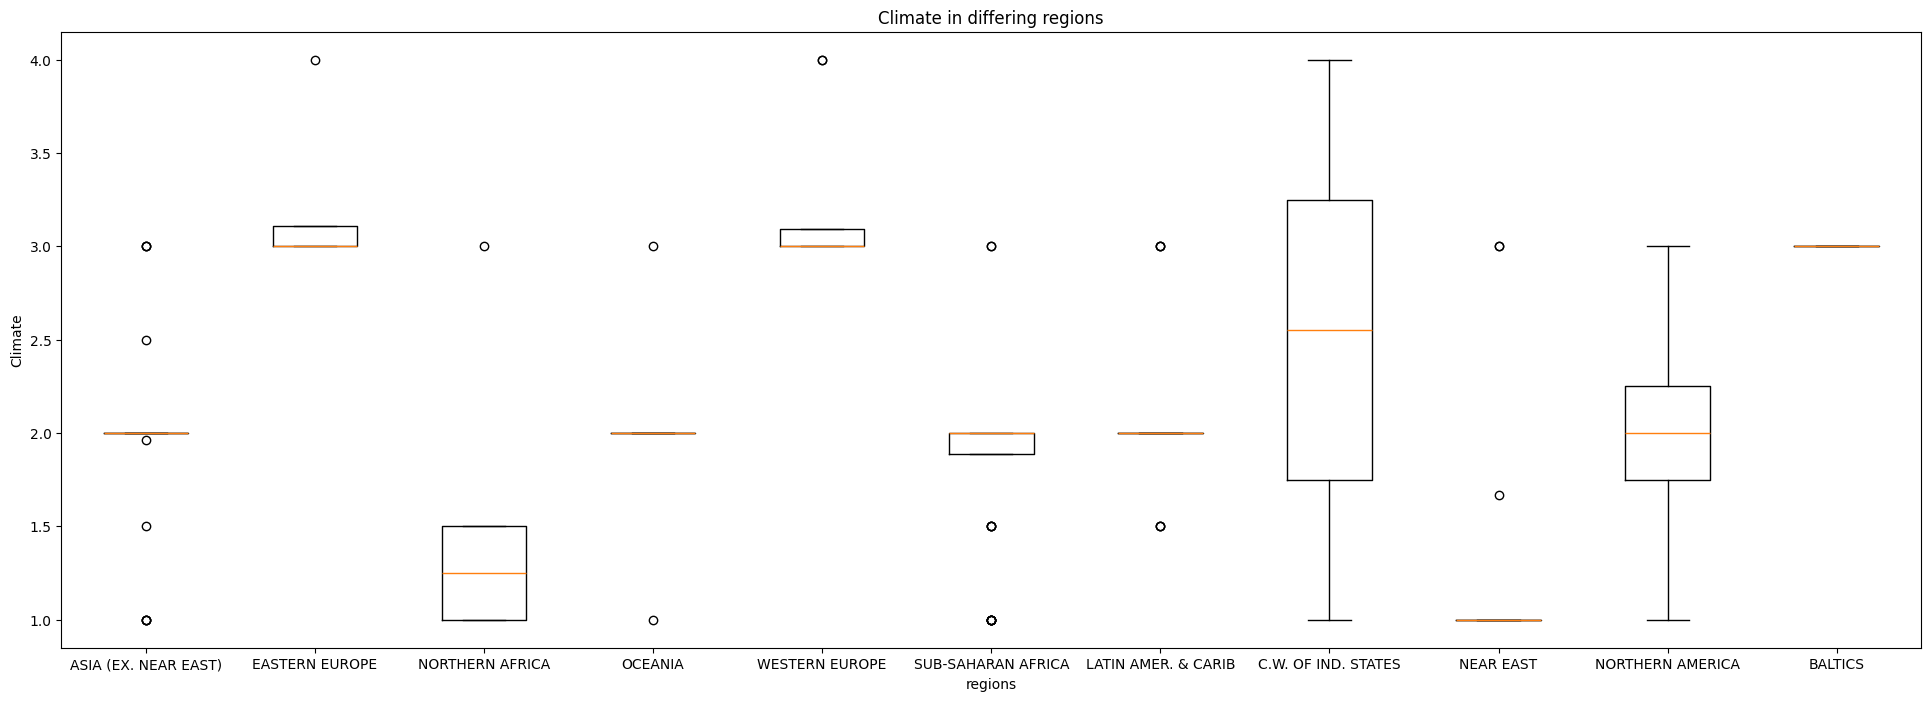

/tmp/ipython-input-1858379378.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(toPlot, labels=regions)


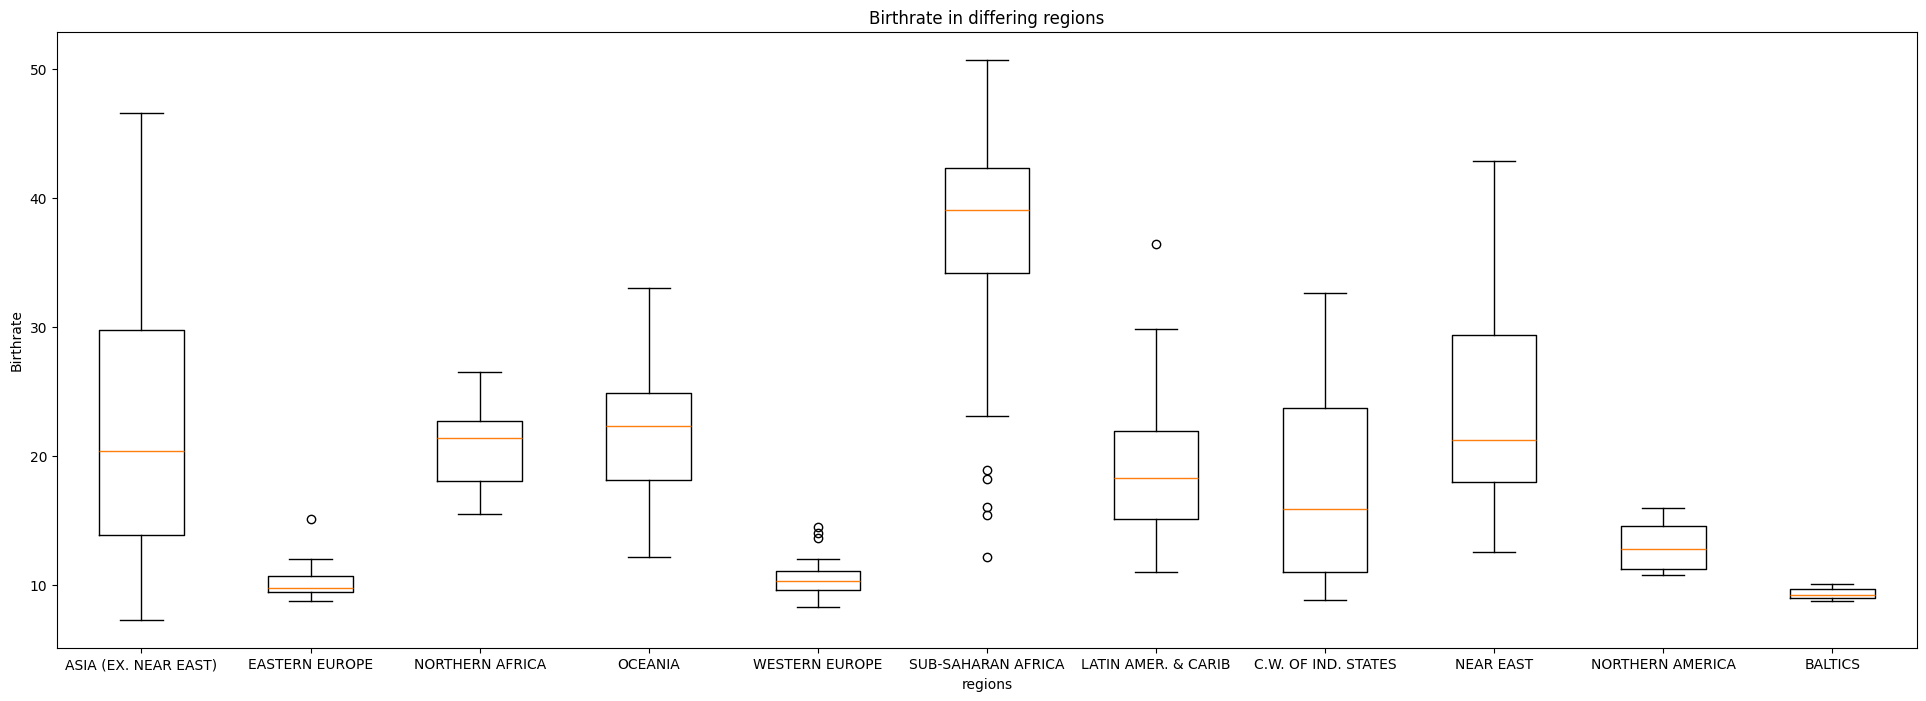

/tmp/ipython-input-1858379378.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(toPlot, labels=regions)


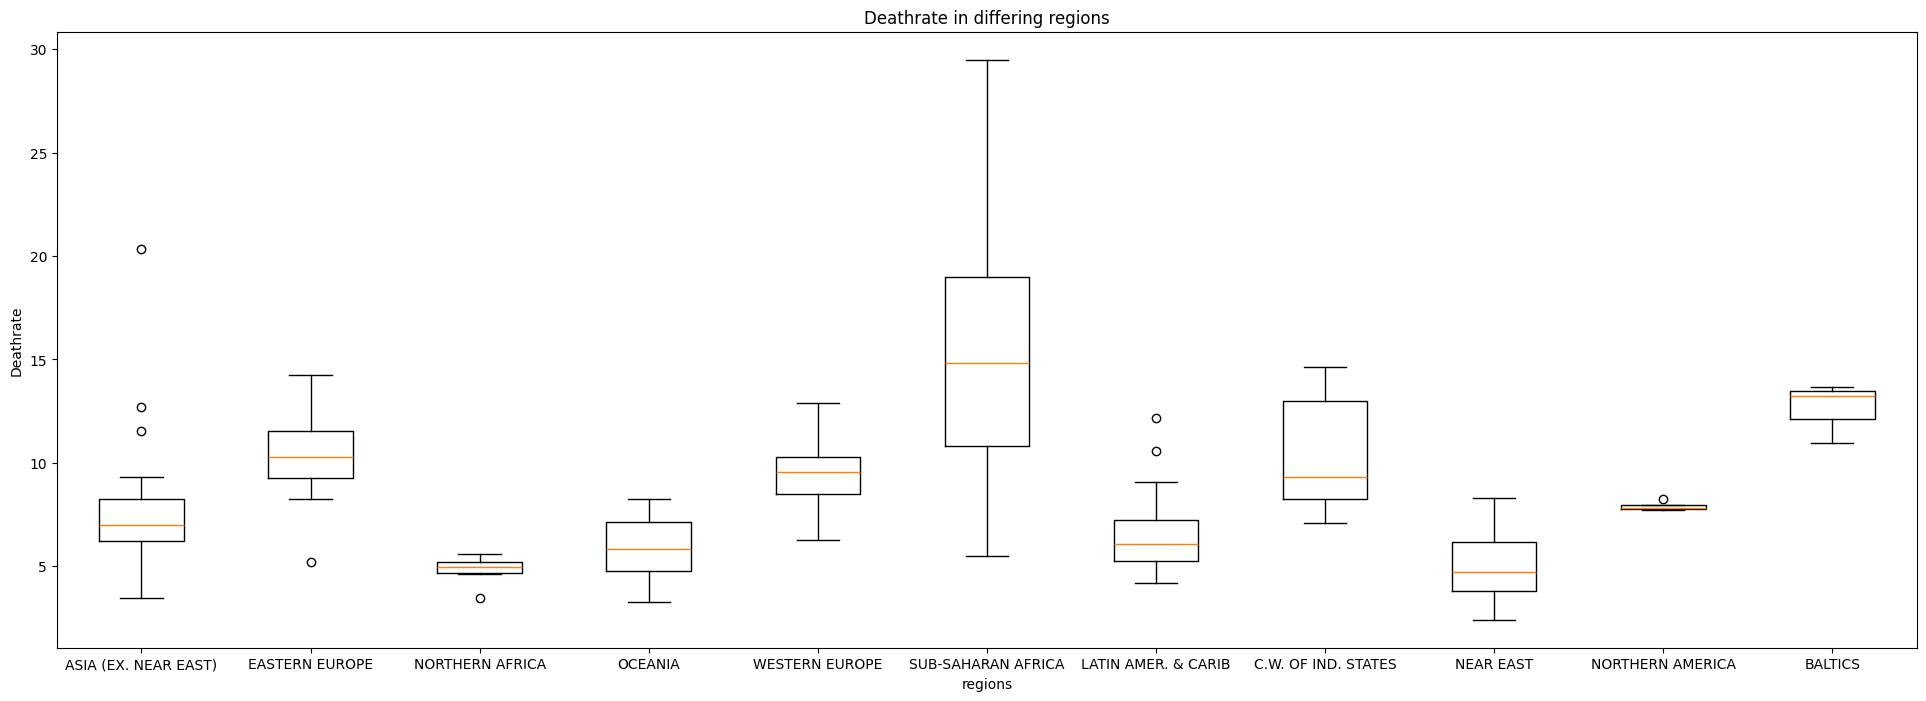

/tmp/ipython-input-1858379378.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(toPlot, labels=regions)


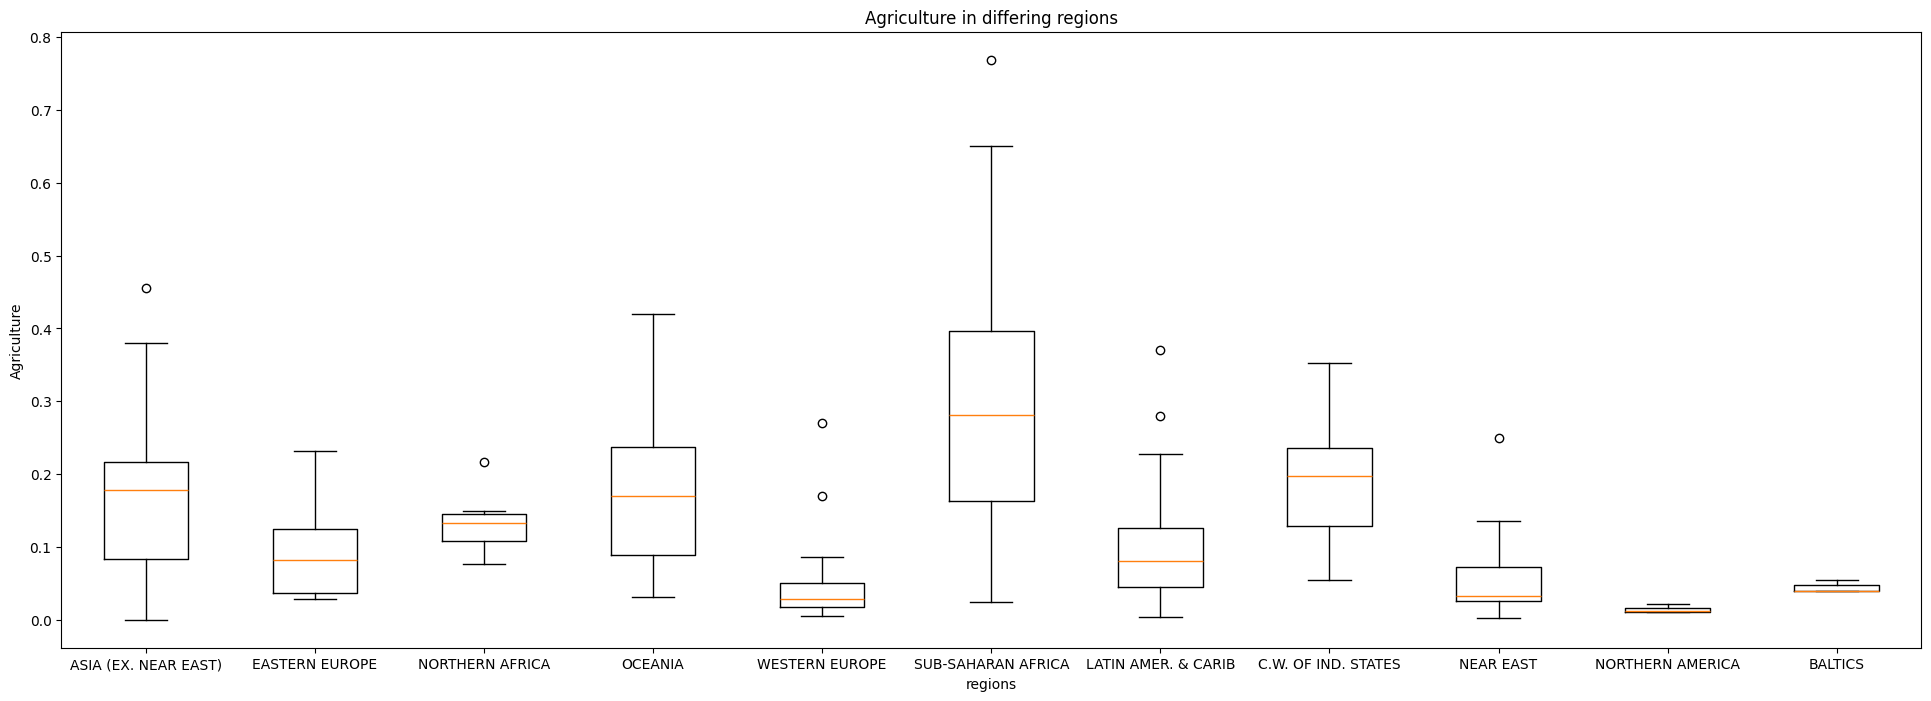

/tmp/ipython-input-1858379378.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(toPlot, labels=regions)


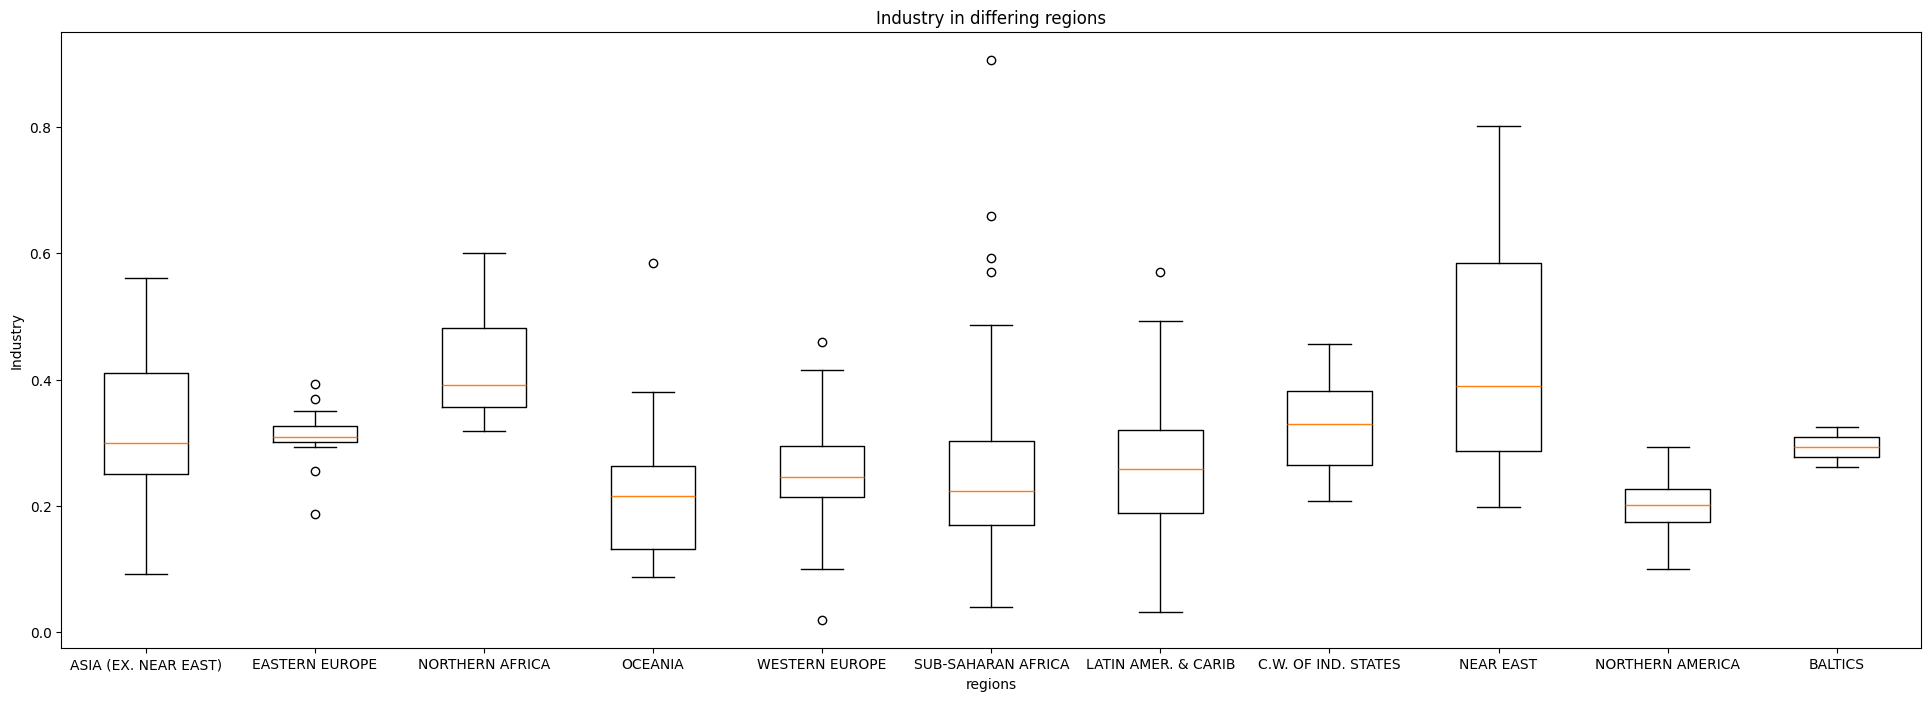

/tmp/ipython-input-1858379378.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(toPlot, labels=regions)


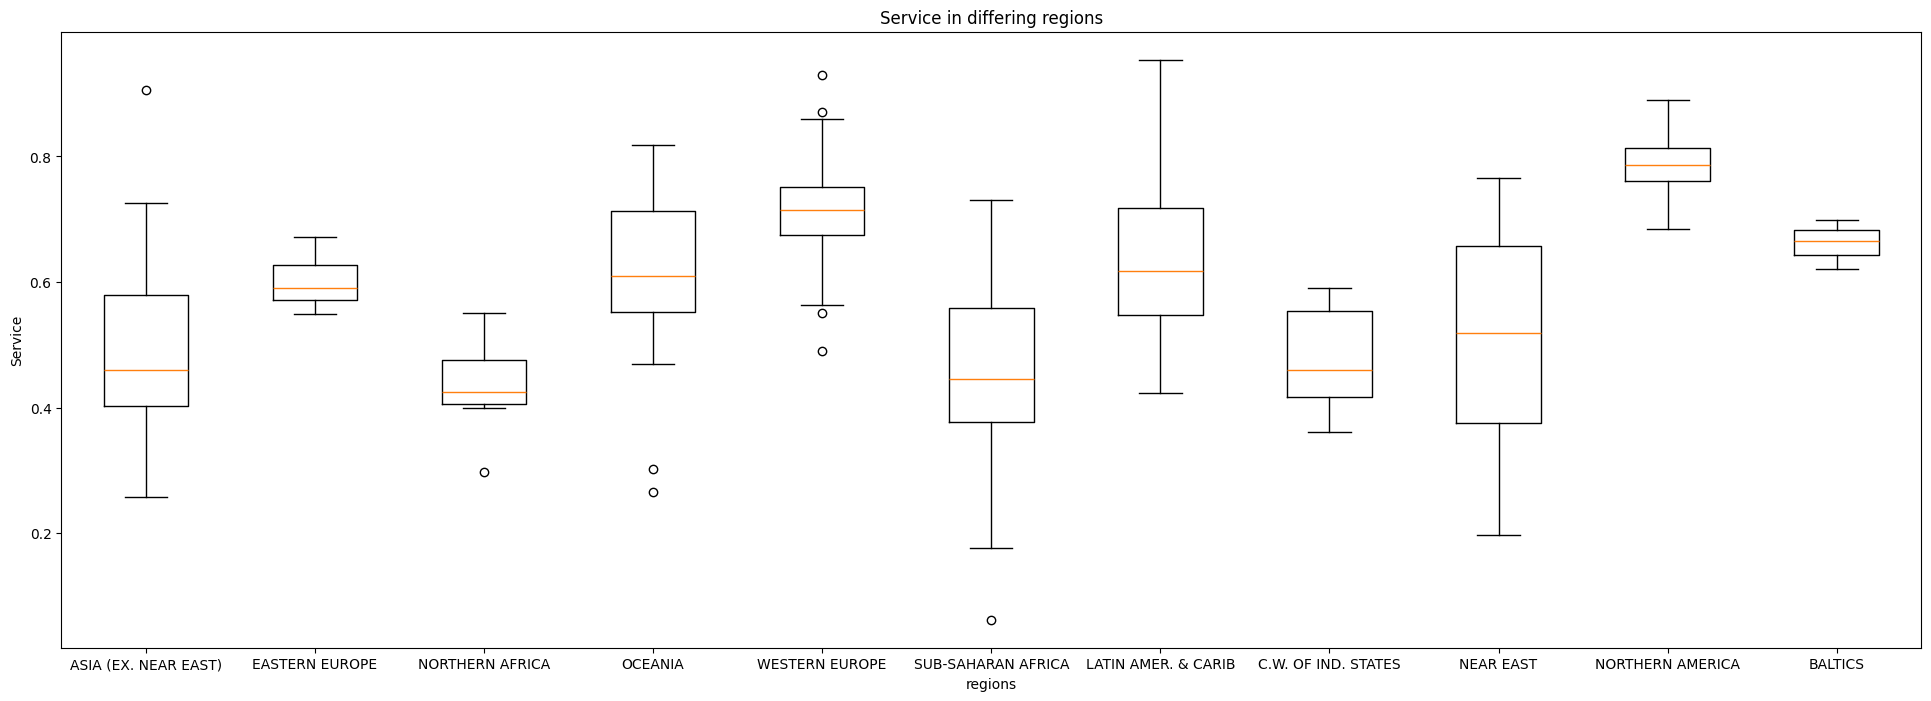

"\nfor i in search:\n  col = countriesInRegion[i]\n\n  for j in regions:\n    countriesInRegion = countries[countries['Region'] == j]\n\n    plt.hist(col, bins=20)\n    plt.xlabel(j)\n    plt.ylabel('Frequency')\n    plt.title('Histogram of ' + i + ' in ' + j)\n\n    plt.show()\n"

In [ ]:
notSearch = ['Country','ISO3','Region']
search = countries.loc[:, ~countries.columns.isin(notSearch)].columns

regions = countries['Region'].unique()

for col in search:
  plt.figure(figsize=(24,8))
  toPlot = []

  for region in regions:
    countriesInRegion = countries[countries['Region'] == region]
    toPlot.append(countriesInRegion[col])

  plt.boxplot(toPlot, labels=regions)
  plt.xlabel("regions")
  plt.ylabel(col)
  plt.title(col+" in differing regions")

  plt.show()

"""
for i in search:
  col = countriesInRegion[i]

  for j in regions:
    countriesInRegion = countries[countries['Region'] == j]

    plt.hist(col, bins=20)
    plt.xlabel(j)
    plt.ylabel('Frequency')
    plt.title('Histogram of ' + i + ' in ' + j)

    plt.show()
"""


<Axes: >

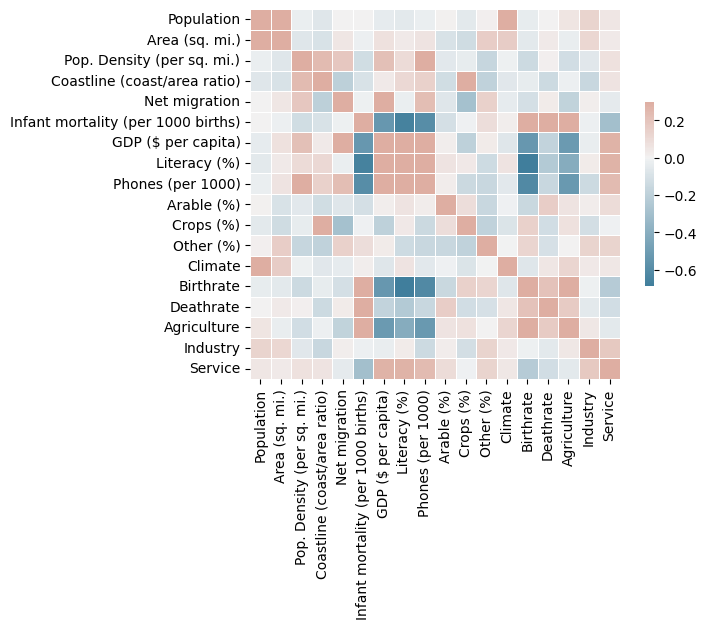

In [ ]:
sb.heatmap(countries.corr(numeric_only=True), cmap=sb.diverging_palette(230, 20, as_cmap=True), vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

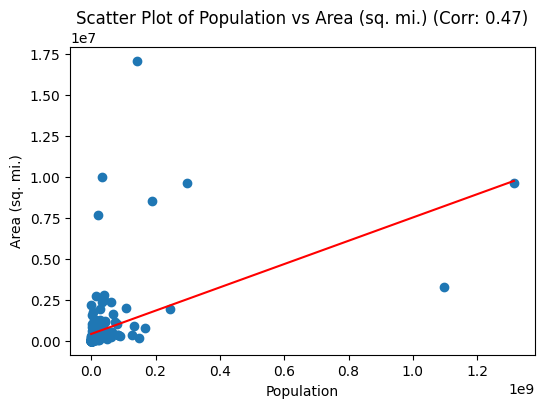

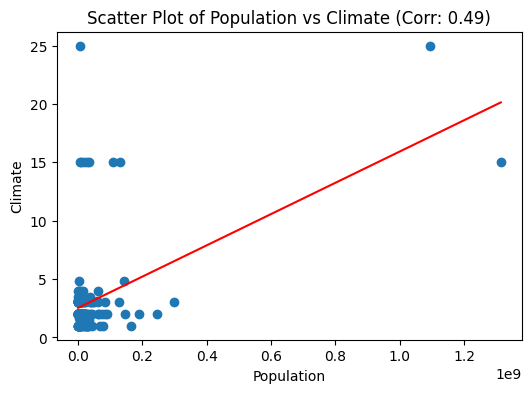

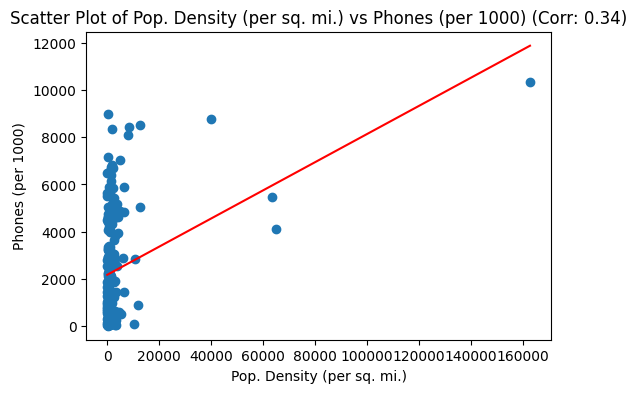

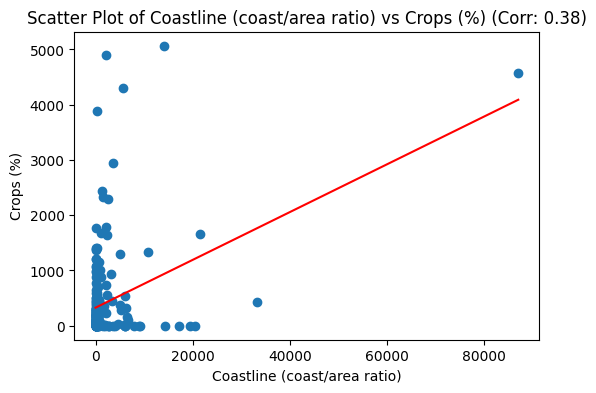

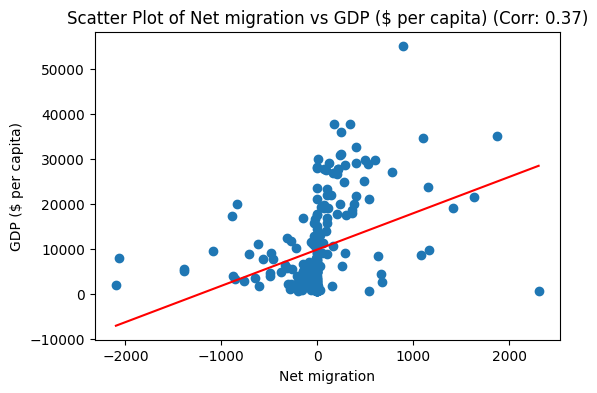

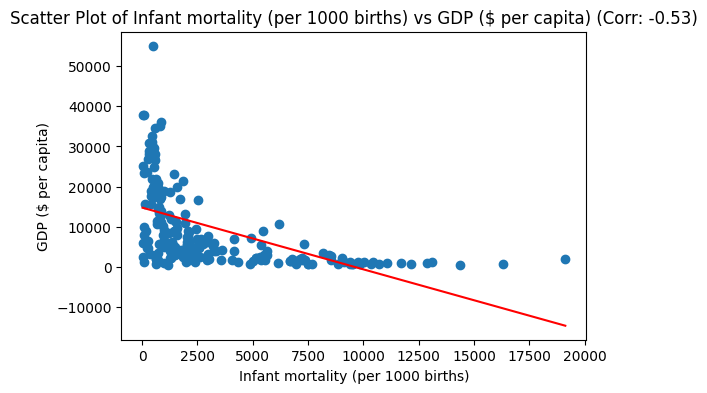

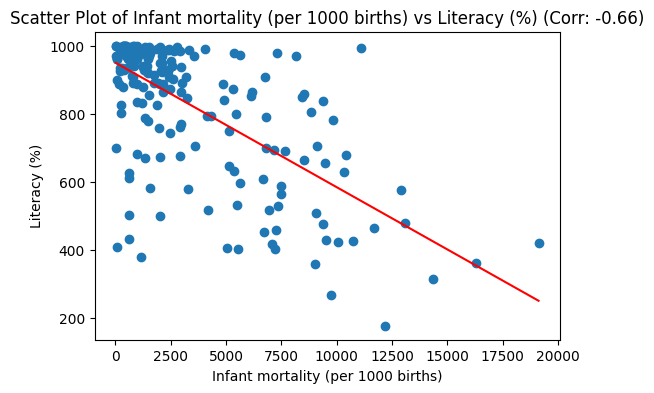

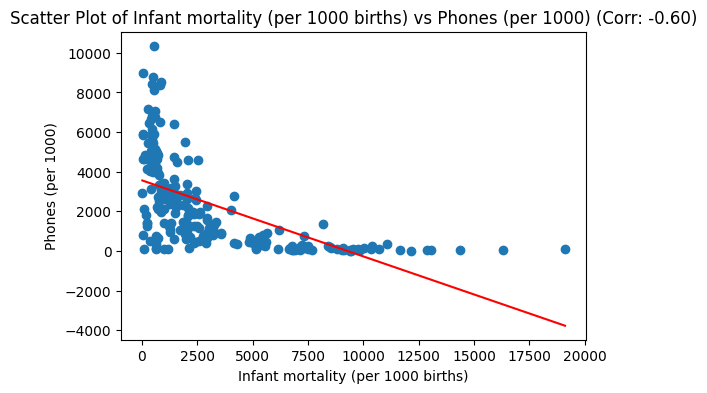

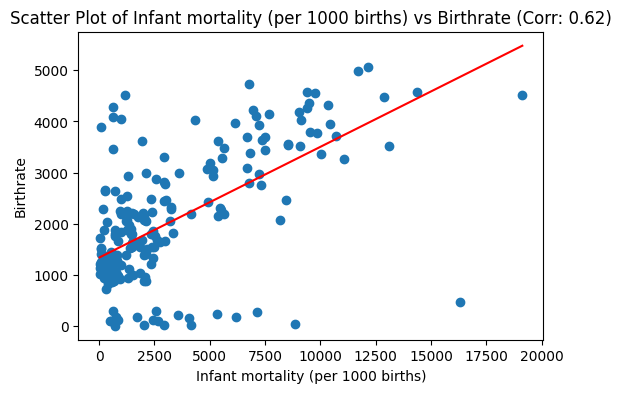

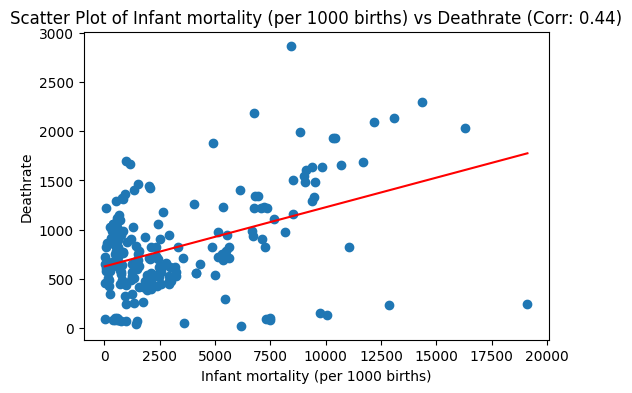

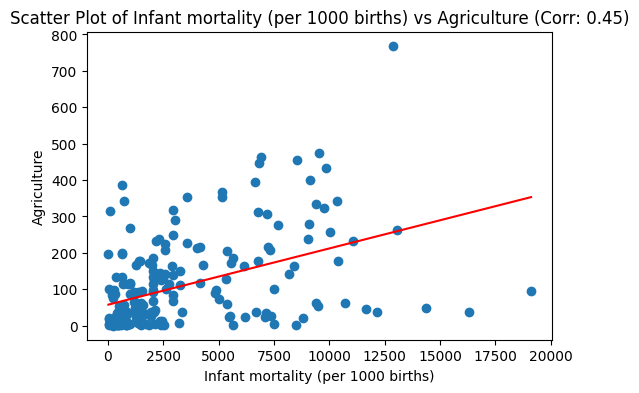

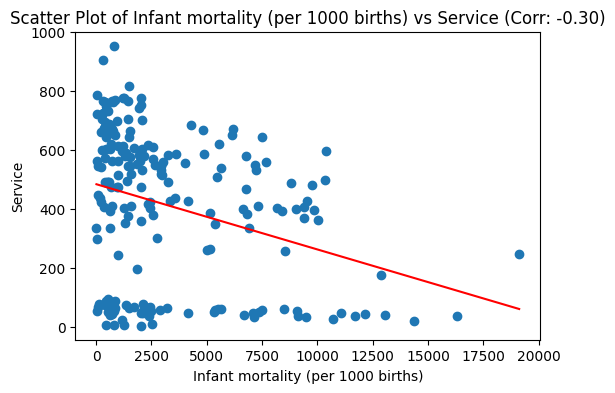

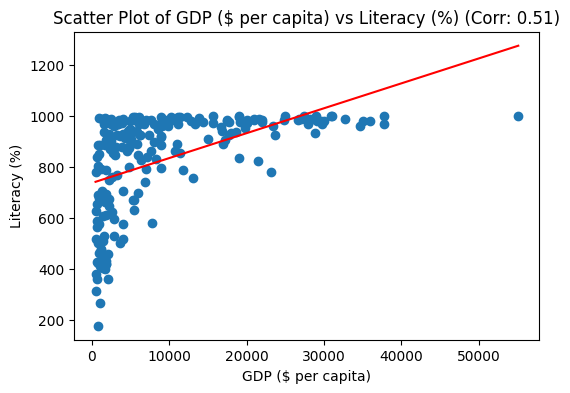

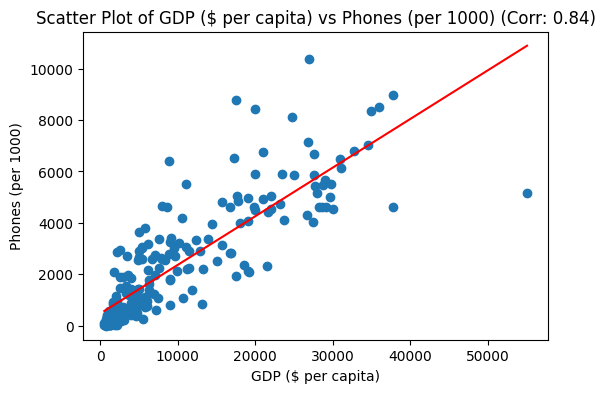

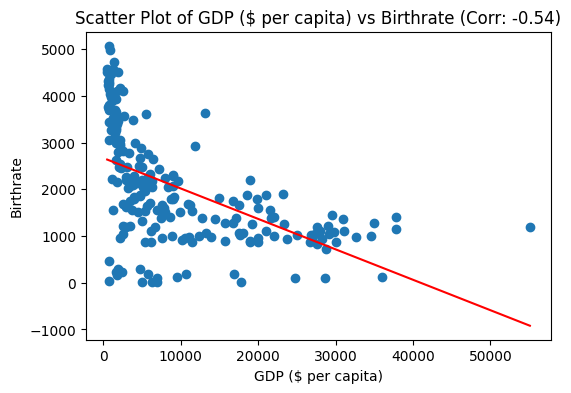

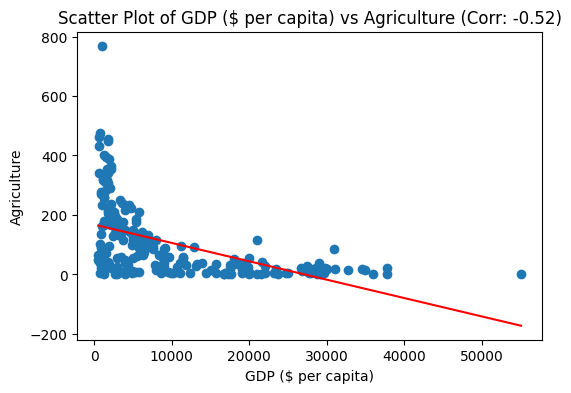

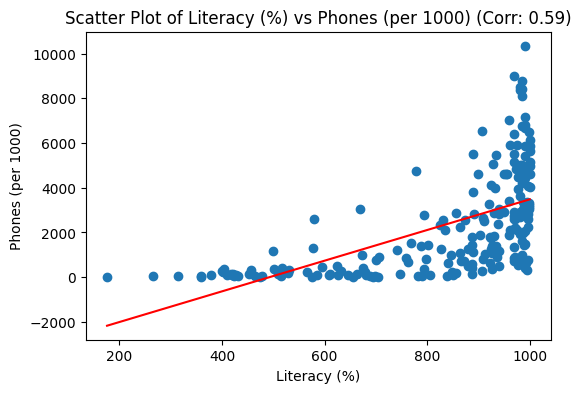

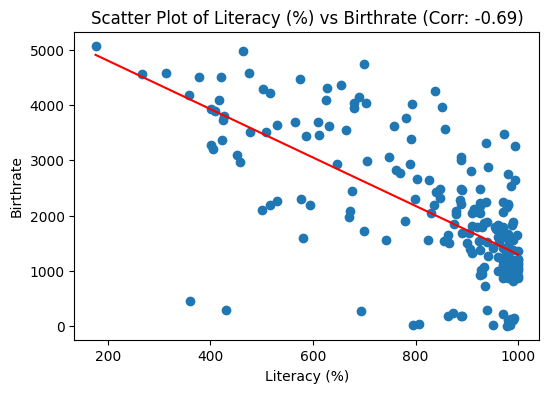

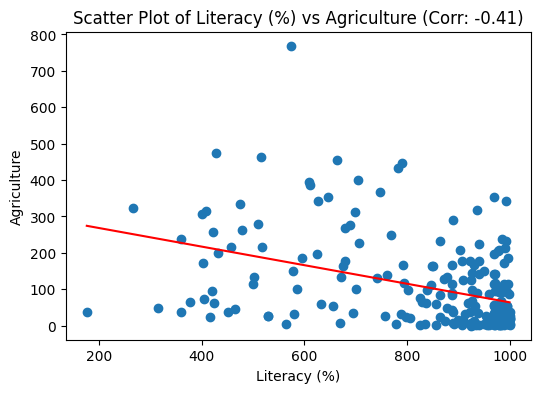

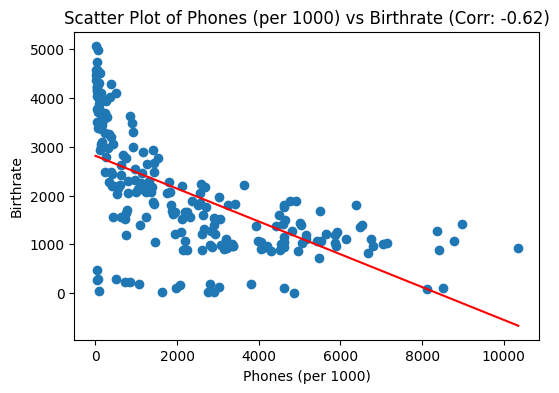

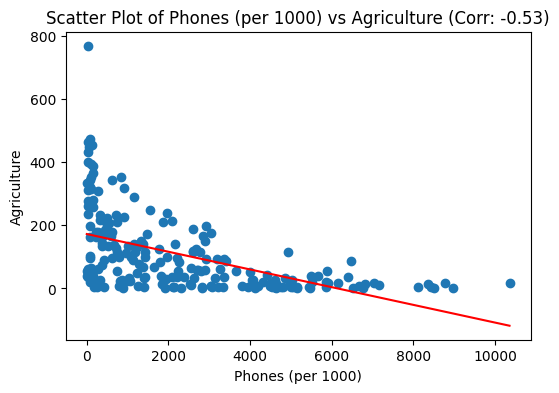

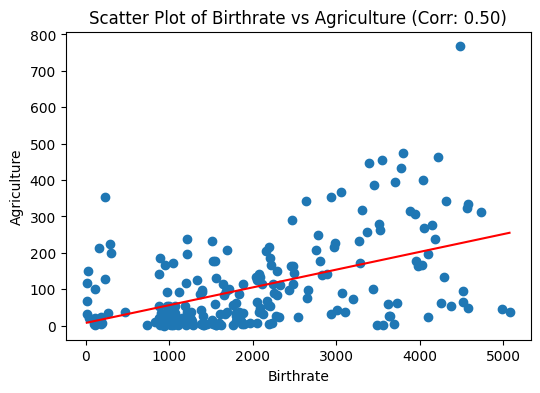

In [ ]:
threshold = 0.3
corr_matrix = countries.corr(numeric_only=True)
data = countries

highly_correlated_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            col1 = corr_matrix.columns[i]
            col2 = corr_matrix.columns[j]
            highly_correlated_pairs.append((col1, col2, corr_matrix.iloc[i, j]))

if highly_correlated_pairs:
    for pair in highly_correlated_pairs:
        plt.figure(figsize=(6, 4))
        plt.scatter(data[pair[0]], data[pair[1]])
        plt.plot(np.unique(data[pair[0]]), np.poly1d(np.polyfit(data[pair[0]], data[pair[1]], 1))(np.unique(data[pair[0]])), color='red')
        plt.title(f'Scatter Plot of {pair[0]} vs {pair[1]} (Corr: {pair[2]:.2f})')
        plt.xlabel(pair[0])
        plt.ylabel(pair[1])
        plt.show()